## Preprocessing

In [301]:
%matplotlib inline
import numpy as np, pandas as pd, seaborn as sb, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

TEST_SIZE = 0.4 #TODO: TRY ANOTHER
RANDOM_SEED = 0 #TODO: TRY ANOTHER

In [302]:
df = pd.read_csv('OCTROI.csv', sep=';', decimal=',')

In [303]:
df.head()

,ANC_EMPLOI,STITUATION_FAM,MODE_LOGT,AGE_VEH,VN_VO,MARQUE,PRIX_VEH,MT_APPORT,MT_FINANCE,MT_MENS,VR_BALLON,DUREE_CONTRAT,MT_PREST,MT_ASSUR,MOIS_GESTION,AGE_CLI,ANCIENNETE,CIBLE
0,65,2,1.0,NaN,VN,REN,19584.65,0.0,19584.65,95.01,19584.63,6,NaN,NaN,01/03/2015,28,1.0,0
1,563,11,2.0,28.0,VO,REN,16995.00,2123.0,14872.00,312.34,NaN,60,150.0,NaN,01/06/2014,64,3.0,0
2,107,2,2.0,16.0,VO,REN,19950.00,3869.0,16081.00,329.93,NaN,60,150.0,NaN,01/08/2015,51,3.0,0
3,143,2,2.0,10.0,VO,REN,17500.00,7143.5,10356.50,217.51,NaN,60,150.0,NaN,01/04/2015,42,4.0,0
4,110,2,NaN,7.0,VO,REN,19740.00,3789.4,15950.60,310.33,7523.04,36,150.0,395.0,01/02/2015,34,4.0,0


In [304]:
N = len(df)
N

8457

In [305]:
y = df['CIBLE'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [306]:
df['STITUATION_FAM'] = df['STITUATION_FAM'].astype('str')
df['MODE_LOGT'] = df['MODE_LOGT'].astype('str')
df['ANNEE_GESTION'] = df['MOIS_GESTION'].str[-4:].astype('int')
df['MOIS_GESTION'] = df['MOIS_GESTION'].str[3:5].astype('int')
df.head()

,ANC_EMPLOI,STITUATION_FAM,MODE_LOGT,AGE_VEH,VN_VO,MARQUE,PRIX_VEH,MT_APPORT,MT_FINANCE,MT_MENS,VR_BALLON,DUREE_CONTRAT,MT_PREST,MT_ASSUR,MOIS_GESTION,AGE_CLI,ANCIENNETE,CIBLE,ANNEE_GESTION
0,65,2,1.0,NaN,VN,REN,19584.65,0.0,19584.65,95.01,19584.63,6,NaN,NaN,3,28,1.0,0,2015
1,563,11,2.0,28.0,VO,REN,16995.00,2123.0,14872.00,312.34,NaN,60,150.0,NaN,6,64,3.0,0,2014
2,107,2,2.0,16.0,VO,REN,19950.00,3869.0,16081.00,329.93,NaN,60,150.0,NaN,8,51,3.0,0,2015
3,143,2,2.0,10.0,VO,REN,17500.00,7143.5,10356.50,217.51,NaN,60,150.0,NaN,4,42,4.0,0,2015
4,110,2,nan,7.0,VO,REN,19740.00,3789.4,15950.60,310.33,7523.04,36,150.0,395.0,2,34,4.0,0,2015


In [307]:
columns_to_be_kept = []
columns_to_review = []
columns_with_nan_kept = []

for colName in df.columns:
    nb_of_nans = df[colName].isna().sum()
    print(colName, ": ", nb_of_nans)
    if nb_of_nans/N < 0.2 and colName != 'CIBLE':
        columns_to_be_kept.append(colName)
        if nb_of_nans > 0:
            columns_with_nan_kept.append(colName)
    else:
        columns_to_review.append(colName)

print('The following columns are to be kept:')
print(columns_to_be_kept)
print(columns_with_nan_kept)

ANC_EMPLOI :  0
STITUATION_FAM :  0
MODE_LOGT :  0
AGE_VEH :  6003
VN_VO :  0
MARQUE :  0
PRIX_VEH :  0
MT_APPORT :  0
MT_FINANCE :  0
MT_MENS :  0
VR_BALLON :  5238
DUREE_CONTRAT :  0
MT_PREST :  1280
MT_ASSUR :  6755
MOIS_GESTION :  0
AGE_CLI :  0
ANCIENNETE :  7271
CIBLE :  0
ANNEE_GESTION :  0
The following columns are to be kept:
['ANC_EMPLOI', 'STITUATION_FAM', 'MODE_LOGT', 'VN_VO', 'MARQUE', 'PRIX_VEH', 'MT_APPORT', 'MT_FINANCE', 'MT_MENS', 'DUREE_CONTRAT', 'MT_PREST', 'MOIS_GESTION', 'AGE_CLI', 'ANNEE_GESTION']
['MT_PREST']


In [308]:
df['MT_PREST'] = df['MT_PREST'].fillna(round(df['MT_PREST'].mean()), inplace=True)

In [309]:
# TODO: add another columns
X_raw = df.loc[:, columns_to_be_kept]
X_raw

,ANC_EMPLOI,STITUATION_FAM,MODE_LOGT,VN_VO,MARQUE,PRIX_VEH,MT_APPORT,MT_FINANCE,MT_MENS,DUREE_CONTRAT,MT_PREST,MOIS_GESTION,AGE_CLI,ANNEE_GESTION
0,65,2,1.0,VN,REN,19584.65,0.00,19584.65,95.01,6,None,3,28,2015
1,563,11,2.0,VO,REN,16995.00,2123.00,14872.00,312.34,60,None,6,64,2014
2,107,2,2.0,VO,REN,19950.00,3869.00,16081.00,329.93,60,None,8,51,2015
3,143,2,2.0,VO,REN,17500.00,7143.50,10356.50,217.51,60,None,4,42,2015
4,110,2,nan,VO,REN,19740.00,3789.40,15950.60,310.33,36,None,2,34,2015
5,446,1,2.0,VN,DAC,14900.00,7900.00,7000.00,220.97,36,None,8,55,2015
6,143,1,2.0,VN,REN,18394.00,5518.00,12876.00,228.72,36,None,11,62,2014
7,108,1,2.0,VN,REN,19923.79,5116.62,14807.17,289.72,60,None,11,44,2014
8,323,2,2.0,VO,REN,18500.00,10000.00,8500.00,180.72,48,None,10,44,2015
9,48,1,2.0,VO,MER,14000.00,4000.00,10000.00,329.76,36,None,5,38,2014


In [310]:
numerical_columns = frozenset(X_raw.describe().columns)
categorical_columns = frozenset(X_raw.columns).difference(numerical_columns)
print(numerical_columns)
print(categorical_columns)

frozenset({'MT_APPORT', 'DUREE_CONTRAT', 'MOIS_GESTION', 'MT_FINANCE', 'ANC_EMPLOI', 'PRIX_VEH', 'MT_MENS', 'AGE_CLI', 'ANNEE_GESTION'})
frozenset({'MT_PREST', 'MODE_LOGT', 'VN_VO', 'STITUATION_FAM', 'MARQUE'})


In [311]:
X_raw_2 = pd.get_dummies(X_raw, columns = list(categorical_columns))
print(X_raw_2.shape)
X_raw_2.head()

(8457, 53)


,ANC_EMPLOI,PRIX_VEH,MT_APPORT,MT_FINANCE,MT_MENS,DUREE_CONTRAT,MOIS_GESTION,AGE_CLI,ANNEE_GESTION,MODE_LOGT_1.0,...,MARQUE_REN,MARQUE_SAA,MARQUE_SEA,MARQUE_SKO,MARQUE_SUB,MARQUE_SUZ,MARQUE_TOY,MARQUE_VAU,MARQUE_VOL,MARQUE_VOV
0,65,19584.65,0.0,19584.65,95.01,6,3,28,2015,1,...,1,0,0,0,0,0,0,0,0,0
1,563,16995.00,2123.0,14872.00,312.34,60,6,64,2014,0,...,1,0,0,0,0,0,0,0,0,0
2,107,19950.00,3869.0,16081.00,329.93,60,8,51,2015,0,...,1,0,0,0,0,0,0,0,0,0
3,143,17500.00,7143.5,10356.50,217.51,60,4,42,2015,0,...,1,0,0,0,0,0,0,0,0,0
4,110,19740.00,3789.4,15950.60,310.33,36,2,34,2015,0,...,1,0,0,0,0,0,0,0,0,0


In [312]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw_2, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [313]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True), 

((array([0, 1], dtype=int64), array([5011,   63], dtype=int64)),
 (array([0, 1], dtype=int64), array([3348,   35], dtype=int64)))

## Logistic Regression

In [204]:
parameters_1 = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1']
}

CLASS_WEIGHT = {0:1, 1:1}

np.random.seed(RANDOM_SEED)

model_1 = LogisticRegression(class_weight=CLASS_WEIGHT)
clf_1 = GridSearchCV(model_1, parameters_1, cv=5, verbose=5, n_jobs=4, scoring = 'roc_auc', return_train_score = True)

clf_1.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  43 out of  50 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight={0: 1, 1: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'penalty': ['l2', 'l1'], 'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=5)

In [205]:
result_1 = clf_1.cv_results_ 

pd.DataFrame([result_1['param_C'], result_1['param_penalty'], result_1['mean_train_score'], result_1['mean_test_score']], index=['C', 'penalty', 'mean on train', 'mean on test'])

,0,1,2,3,4,5,6,7,8,9
C,0.001,0.001,0.01,0.01,0.1,0.1,1,1,10,10
penalty,l2,l1,l2,l1,l2,l1,l2,l1,l2,l1
mean on train,0.77695,0.5,0.80229,0.5,0.814783,0.76539,0.82121,0.818277,0.821878,0.821817
mean on test,0.696131,0.5,0.704721,0.5,0.706717,0.71592,0.696664,0.715855,0.671368,0.681929


In [206]:
best_params_1 = clf_1.best_params_
print(best_params_1)

model_1_best = LogisticRegression(C = best_params_1['C'], penalty = best_params_1['penalty'], class_weight=CLASS_WEIGHT)
model_1_best.fit(X_train, y_train)

{'penalty': 'l1', 'C': 0.1}


LogisticRegression(C=0.1, class_weight={0: 1, 1: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

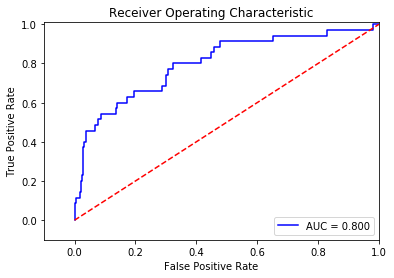

In [207]:
y_pred_1 = model_1_best.predict_proba(X_test)[:, 1]

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_1)

roc_auc_1 = auc(fpr_1, tpr_1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1, tpr_1, 'b',label='AUC = %0.3f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [208]:
L_1 = list(zip(X_raw_2.columns, list(model_1_best.coef_[0])))
print(L_1)

[('ANC_EMPLOI', 0.0), ('PRIX_VEH', -0.3072115504615047), ('MT_APPORT', -0.11504044811302738), ('MT_FINANCE', 0.0), ('MT_MENS', 0.0), ('DUREE_CONTRAT', 0.1645165895469306), ('MOIS_GESTION', -0.00014084201987955562), ('AGE_CLI', -0.05876504686068565), ('ANNEE_GESTION', -0.0007468442559800299), ('MODE_LOGT_1.0', 0.0), ('MODE_LOGT_2.0', -0.13454986260229185), ('MODE_LOGT_3.0', 0.0), ('MODE_LOGT_4.0', 0.0), ('MODE_LOGT_nan', 0.16821147563495586), ('VN_VO_VN', -0.001710208479383917), ('VN_VO_VO', 0.0), ('STITUATION_FAM_1', 0.0), ('STITUATION_FAM_11', 0.0), ('STITUATION_FAM_2', 0.09334800366563503), ('STITUATION_FAM_3', 0.0), ('STITUATION_FAM_4', 0.0), ('STITUATION_FAM_5', 0.0), ('MARQUE_AUD', 0.0), ('MARQUE_BMW', 0.0713710555834973), ('MARQUE_CHV', 0.05973264089327443), ('MARQUE_CIT', 0.030751402763200902), ('MARQUE_DAC', 0.0), ('MARQUE_DAI', 0.0), ('MARQUE_FIA', 0.0), ('MARQUE_FOR', -0.0041154164708599944), ('MARQUE_GWA', 0.0), ('MARQUE_HON', 0.0), ('MARQUE_HYU', 0.0), ('MARQUE_JAG', 0.0), 

In [209]:
best_columns_1 = np.array(list(filter(lambda x : abs(x[1]) > 0.01, L_1)))
best_columns_1

array([['PRIX_VEH', '-0.3072115504615047'],
       ['MT_APPORT', '-0.11504044811302738'],
       ['DUREE_CONTRAT', '0.1645165895469306'],
       ['AGE_CLI', '-0.05876504686068565'],
       ['MODE_LOGT_2.0', '-0.13454986260229185'],
       ['MODE_LOGT_nan', '0.16821147563495586'],
       ['STITUATION_FAM_2', '0.09334800366563503'],
       ['MARQUE_BMW', '0.0713710555834973'],
       ['MARQUE_CHV', '0.05973264089327443'],
       ['MARQUE_CIT', '0.030751402763200902'],
       ['MARQUE_MAZ', '0.04221800017444792'],
       ['MARQUE_SEA', '0.061543716889114246'],
       ['MARQUE_VAU', '0.07143888130741476']], dtype='<U20')

## Logistic Regression with Dimensionality Reduction

In [210]:
X_raw_3 = X_raw_2[best_columns_1[:,0]]
X_train_raw_red, X_test_raw_red, y_train, y_test = train_test_split(X_raw_3, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

scaler = StandardScaler()

X_train_red = scaler.fit_transform(X_train_raw_red)
X_test_red = scaler.transform(X_test_raw_red)

In [211]:
parameters_2 = {
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'penalty': ['l2', 'l1']
}

model_2 = LogisticRegression()
clf_2 = GridSearchCV(model_2, parameters_2, cv=5, verbose=5, n_jobs=4, scoring = 'roc_auc', return_train_score=True)

clf_2.fit(X_train_red, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'penalty': ['l2', 'l1'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=5)

In [212]:
result_2 = clf_2.cv_results_ 

pd.DataFrame([result_2['param_C'], result_2['param_penalty'], result_2['mean_train_score'], result_2['mean_test_score']], index=['C', 'penalty', 'mean on train', 'mean on test'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
C,0.0001,0.0001,0.001,0.001,0.01,0.01,0.1,0.1,1,1,10,10,100,100
penalty,l2,l1,l2,l1,l2,l1,l2,l1,l2,l1,l2,l1,l2,l1
mean on train,0.758059,0.5,0.766883,0.5,0.772841,0.5,0.7763,0.766193,0.778219,0.77773,0.778596,0.778533,0.778587,0.778597
mean on test,0.748743,0.5,0.74519,0.5,0.733158,0.5,0.717935,0.720197,0.699942,0.724911,0.680687,0.689145,0.67791,0.677733


In [213]:
best_params_2 = clf_2.best_params_
print(best_params_2)

model_2_best = LogisticRegression(C = best_params_2['C'], penalty = best_params_2['penalty'])
model_2_best.fit(X_train_red, y_train)

{'penalty': 'l2', 'C': 0.0001}


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

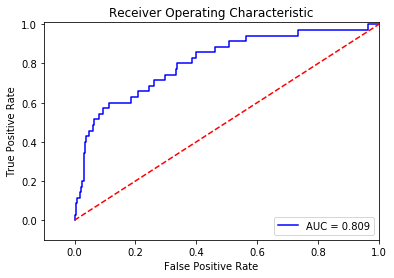

In [214]:
y_pred_2 = model_2_best.predict_proba(X_test_red)[:, 1]

fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_2)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_2, tpr_2, 'b',label='AUC = %0.3f'% roc_auc_2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression in keras

In [42]:
import tensorflow as tf

np.random.seed(RANDOM_SEED)

def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

auc_metric = as_keras_metric(tf.metrics.auc)

In [43]:
from keras import Model
from keras.layers import Input, Dense, Activation, Dropout, Concatenate
from keras.optimizers import SGD, Adam
from keras.initializers import glorot_uniform
from keras import regularizers

N_COLUMNS = len(X_raw_2.columns)
penalties = [regularizers.l1(1e-4), regularizers.l1(1e-3), regularizers.l1(1e-2), regularizers.l1(1e-1), 
           regularizers.l2(1e-4), regularizers.l2(1e-3), regularizers.l2(1e-2), regularizers.l2(1e-1)]

test_results = []
best_test_result = 0
best_test_index = 0

for i, penalty in enumerate(penalties):
    np.random.seed(RANDOM_SEED)
    Tensor_X_input = Input(shape = (N_COLUMNS,), name = 'input')
    Tensor_X = Dense(units = 1, name = 'Dense', kernel_regularizer=penalty) (Tensor_X_input)
    Tensor_X = Activation('sigmoid') (Tensor_X)
    model_3 = Model(inputs = Tensor_X_input, outputs = Tensor_X)
    print('Test for FNN with regularizer', i)
    adam = Adam()
    model_3.compile(loss="binary_crossentropy", optimizer = adam, metrics=[auc_metric])
    history_3 = model_3.fit(X_train, y_train, batch_size=128, epochs=20, verbose=0, validation_split=0.2)
    print('auc: ', history_3.history['auc'][-1], '. val_auc: ', history_3.history['val_auc'][-1])
    if history_3.history['val_auc'][-1] > best_test_result:
        best_test_result = history_3.history['val_auc'][-1]
        best_test_index = i

Test for FNN with regularizer 0
auc:  0.5959345326690316 . val_auc:  0.5956306403493646
Test for FNN with regularizer 1
auc:  0.5949923982905707 . val_auc:  0.5947926218873761
Test for FNN with regularizer 2
auc:  0.5808907205701961 . val_auc:  0.5799033995919627
Test for FNN with regularizer 3
auc:  0.5249613800287305 . val_auc:  0.5253221868294213
Test for FNN with regularizer 4
auc:  0.5959593871450977 . val_auc:  0.5957196439428283
Test for FNN with regularizer 5
auc:  0.5963850774533586 . val_auc:  0.596109356492611
Test for FNN with regularizer 6
auc:  0.5965669557184209 . val_auc:  0.5963108102676317
Test for FNN with regularizer 7
auc:  0.5860743664056393 . val_auc:  0.58592325854184


In [44]:
best_test_index, best_test_result

(6, 0.5963108102676317)

In [45]:
Tensor_X_input = Input(shape = (N_COLUMNS,), name = 'input')
Tensor_X = Dense(units = 1, name = 'Dense', kernel_regularizer=penalties[best_test_index]) (Tensor_X_input)
Tensor_X = Activation('sigmoid') (Tensor_X)
model_3 = Model(inputs = Tensor_X_input, outputs = Tensor_X)

np.random.seed(RANDOM_SEED)
adam = Adam()
model_3.compile(loss="binary_crossentropy", optimizer = adam, metrics=[auc_metric])
history_3 = model_3.fit(X_train, y_train, batch_size=128, epochs=1000, verbose=2, validation_split=0.2)

Train on 4059 samples, validate on 1015 samples
Epoch 1/1000
 - 1s - loss: 0.8607 - auc: 0.5284 - val_loss: 0.8530 - val_auc: 0.4994
Epoch 2/1000
 - 0s - loss: 0.8126 - auc: 0.5147 - val_loss: 0.8105 - val_auc: 0.5081
Epoch 3/1000
 - 0s - loss: 0.7705 - auc: 0.5132 - val_loss: 0.7756 - val_auc: 0.5118
Epoch 4/1000
 - 0s - loss: 0.7341 - auc: 0.5100 - val_loss: 0.7443 - val_auc: 0.5144
Epoch 5/1000
 - 0s - loss: 0.7018 - auc: 0.5163 - val_loss: 0.7165 - val_auc: 0.5171
Epoch 6/1000
 - 0s - loss: 0.6733 - auc: 0.5136 - val_loss: 0.6929 - val_auc: 0.5189
Epoch 7/1000
 - 0s - loss: 0.6479 - auc: 0.5211 - val_loss: 0.6713 - val_auc: 0.5204
Epoch 8/1000
 - 0s - loss: 0.6254 - auc: 0.5209 - val_loss: 0.6514 - val_auc: 0.5220
Epoch 9/1000
 - 0s - loss: 0.6050 - auc: 0.5219 - val_loss: 0.6339 - val_auc: 0.5235
Epoch 10/1000
 - 0s - loss: 0.5865 - auc: 0.5227 - val_loss: 0.6173 - val_auc: 0.5252
Epoch 11/1000
 - 0s - loss: 0.5694 - auc: 0.5262 - val_loss: 0.6030 - val_auc: 0.5269
Epoch 12/1000
 

Epoch 96/1000
 - 0s - loss: 0.1285 - auc: 0.5548 - val_loss: 0.1537 - val_auc: 0.5551
Epoch 97/1000
 - 0s - loss: 0.1270 - auc: 0.5548 - val_loss: 0.1522 - val_auc: 0.5552
Epoch 98/1000
 - 0s - loss: 0.1255 - auc: 0.5550 - val_loss: 0.1507 - val_auc: 0.5553
Epoch 99/1000
 - 0s - loss: 0.1240 - auc: 0.5550 - val_loss: 0.1492 - val_auc: 0.5553
Epoch 100/1000
 - 0s - loss: 0.1225 - auc: 0.5553 - val_loss: 0.1478 - val_auc: 0.5554
Epoch 101/1000
 - 0s - loss: 0.1212 - auc: 0.5552 - val_loss: 0.1465 - val_auc: 0.5555
Epoch 102/1000
 - 0s - loss: 0.1198 - auc: 0.5553 - val_loss: 0.1450 - val_auc: 0.5555
Epoch 103/1000
 - 0s - loss: 0.1185 - auc: 0.5550 - val_loss: 0.1437 - val_auc: 0.5556
Epoch 104/1000
 - 0s - loss: 0.1171 - auc: 0.5552 - val_loss: 0.1425 - val_auc: 0.5557
Epoch 105/1000
 - 0s - loss: 0.1158 - auc: 0.5553 - val_loss: 0.1413 - val_auc: 0.5557
Epoch 106/1000
 - 0s - loss: 0.1145 - auc: 0.5554 - val_loss: 0.1400 - val_auc: 0.5558
Epoch 107/1000
 - 0s - loss: 0.1133 - auc: 0.55

Epoch 191/1000
 - 0s - loss: 0.0624 - auc: 0.5649 - val_loss: 0.0979 - val_auc: 0.5651
Epoch 192/1000
 - 0s - loss: 0.0622 - auc: 0.5650 - val_loss: 0.0979 - val_auc: 0.5652
Epoch 193/1000
 - 0s - loss: 0.0619 - auc: 0.5651 - val_loss: 0.0979 - val_auc: 0.5653
Epoch 194/1000
 - 0s - loss: 0.0617 - auc: 0.5652 - val_loss: 0.0976 - val_auc: 0.5654
Epoch 195/1000
 - 0s - loss: 0.0615 - auc: 0.5653 - val_loss: 0.0976 - val_auc: 0.5656
Epoch 196/1000
 - 0s - loss: 0.0613 - auc: 0.5655 - val_loss: 0.0973 - val_auc: 0.5657
Epoch 197/1000
 - 0s - loss: 0.0611 - auc: 0.5657 - val_loss: 0.0975 - val_auc: 0.5658
Epoch 198/1000
 - 0s - loss: 0.0609 - auc: 0.5658 - val_loss: 0.0973 - val_auc: 0.5660
Epoch 199/1000
 - 0s - loss: 0.0606 - auc: 0.5658 - val_loss: 0.0971 - val_auc: 0.5661
Epoch 200/1000
 - 0s - loss: 0.0605 - auc: 0.5660 - val_loss: 0.0973 - val_auc: 0.5662
Epoch 201/1000
 - 0s - loss: 0.0602 - auc: 0.5661 - val_loss: 0.0970 - val_auc: 0.5663
Epoch 202/1000
 - 0s - loss: 0.0600 - auc: 

Epoch 286/1000
 - 0s - loss: 0.0530 - auc: 0.5780 - val_loss: 0.0979 - val_auc: 0.5782
Epoch 287/1000
 - 0s - loss: 0.0529 - auc: 0.5782 - val_loss: 0.0980 - val_auc: 0.5783
Epoch 288/1000
 - 0s - loss: 0.0529 - auc: 0.5784 - val_loss: 0.0981 - val_auc: 0.5785
Epoch 289/1000
 - 0s - loss: 0.0529 - auc: 0.5785 - val_loss: 0.0979 - val_auc: 0.5786
Epoch 290/1000
 - 0s - loss: 0.0528 - auc: 0.5786 - val_loss: 0.0980 - val_auc: 0.5788
Epoch 291/1000
 - 0s - loss: 0.0528 - auc: 0.5789 - val_loss: 0.0983 - val_auc: 0.5790
Epoch 292/1000
 - 0s - loss: 0.0528 - auc: 0.5790 - val_loss: 0.0981 - val_auc: 0.5791
Epoch 293/1000
 - 0s - loss: 0.0528 - auc: 0.5792 - val_loss: 0.0982 - val_auc: 0.5793
Epoch 294/1000
 - 0s - loss: 0.0528 - auc: 0.5794 - val_loss: 0.0983 - val_auc: 0.5795
Epoch 295/1000
 - 0s - loss: 0.0528 - auc: 0.5794 - val_loss: 0.0982 - val_auc: 0.5796
Epoch 296/1000
 - 0s - loss: 0.0527 - auc: 0.5797 - val_loss: 0.0985 - val_auc: 0.5798
Epoch 297/1000
 - 0s - loss: 0.0527 - auc: 

 - 0s - loss: 0.0524 - auc: 0.5932 - val_loss: 0.1003 - val_auc: 0.5933
Epoch 381/1000
 - 0s - loss: 0.0524 - auc: 0.5934 - val_loss: 0.1004 - val_auc: 0.5935
Epoch 382/1000
 - 0s - loss: 0.0524 - auc: 0.5936 - val_loss: 0.1004 - val_auc: 0.5937
Epoch 383/1000
 - 0s - loss: 0.0524 - auc: 0.5936 - val_loss: 0.1003 - val_auc: 0.5938
Epoch 384/1000
 - 0s - loss: 0.0524 - auc: 0.5938 - val_loss: 0.1005 - val_auc: 0.5940
Epoch 385/1000
 - 0s - loss: 0.0524 - auc: 0.5940 - val_loss: 0.1004 - val_auc: 0.5942
Epoch 386/1000
 - 0s - loss: 0.0524 - auc: 0.5942 - val_loss: 0.1005 - val_auc: 0.5943
Epoch 387/1000
 - 0s - loss: 0.0524 - auc: 0.5943 - val_loss: 0.1002 - val_auc: 0.5945
Epoch 388/1000
 - 0s - loss: 0.0524 - auc: 0.5945 - val_loss: 0.1004 - val_auc: 0.5947
Epoch 389/1000
 - 0s - loss: 0.0524 - auc: 0.5947 - val_loss: 0.1005 - val_auc: 0.5948
Epoch 390/1000
 - 0s - loss: 0.0524 - auc: 0.5949 - val_loss: 0.1003 - val_auc: 0.5950
Epoch 391/1000
 - 0s - loss: 0.0524 - auc: 0.5951 - val_lo

Epoch 475/1000
 - 0s - loss: 0.0524 - auc: 0.6097 - val_loss: 0.1007 - val_auc: 0.6098
Epoch 476/1000
 - 0s - loss: 0.0524 - auc: 0.6099 - val_loss: 0.1006 - val_auc: 0.6100
Epoch 477/1000
 - 0s - loss: 0.0524 - auc: 0.6101 - val_loss: 0.1009 - val_auc: 0.6102
Epoch 478/1000
 - 0s - loss: 0.0524 - auc: 0.6102 - val_loss: 0.1006 - val_auc: 0.6103
Epoch 479/1000
 - 0s - loss: 0.0524 - auc: 0.6104 - val_loss: 0.1008 - val_auc: 0.6105
Epoch 480/1000
 - 0s - loss: 0.0524 - auc: 0.6106 - val_loss: 0.1005 - val_auc: 0.6107
Epoch 481/1000
 - 0s - loss: 0.0524 - auc: 0.6107 - val_loss: 0.1007 - val_auc: 0.6108
Epoch 482/1000
 - 0s - loss: 0.0524 - auc: 0.6109 - val_loss: 0.1008 - val_auc: 0.6110
Epoch 483/1000
 - 0s - loss: 0.0524 - auc: 0.6111 - val_loss: 0.1006 - val_auc: 0.6112
Epoch 484/1000
 - 0s - loss: 0.0524 - auc: 0.6113 - val_loss: 0.1008 - val_auc: 0.6114
Epoch 485/1000
 - 0s - loss: 0.0524 - auc: 0.6114 - val_loss: 0.1007 - val_auc: 0.6115
Epoch 486/1000
 - 0s - loss: 0.0524 - auc: 

 - 0s - loss: 0.0524 - auc: 0.6248 - val_loss: 0.1008 - val_auc: 0.6249
Epoch 570/1000
 - 0s - loss: 0.0524 - auc: 0.6249 - val_loss: 0.1006 - val_auc: 0.6250
Epoch 571/1000
 - 0s - loss: 0.0524 - auc: 0.6251 - val_loss: 0.1007 - val_auc: 0.6252
Epoch 572/1000
 - 0s - loss: 0.0524 - auc: 0.6253 - val_loss: 0.1006 - val_auc: 0.6253
Epoch 573/1000
 - 0s - loss: 0.0524 - auc: 0.6254 - val_loss: 0.1007 - val_auc: 0.6255
Epoch 574/1000
 - 0s - loss: 0.0524 - auc: 0.6255 - val_loss: 0.1006 - val_auc: 0.6256
Epoch 575/1000
 - 0s - loss: 0.0524 - auc: 0.6257 - val_loss: 0.1007 - val_auc: 0.6258
Epoch 576/1000
 - 0s - loss: 0.0524 - auc: 0.6258 - val_loss: 0.1005 - val_auc: 0.6259
Epoch 577/1000
 - 0s - loss: 0.0524 - auc: 0.6260 - val_loss: 0.1007 - val_auc: 0.6261
Epoch 578/1000
 - 0s - loss: 0.0524 - auc: 0.6261 - val_loss: 0.1007 - val_auc: 0.6262
Epoch 579/1000
 - 0s - loss: 0.0524 - auc: 0.6263 - val_loss: 0.1006 - val_auc: 0.6264
Epoch 580/1000
 - 0s - loss: 0.0524 - auc: 0.6264 - val_lo

Epoch 664/1000
 - 0s - loss: 0.0524 - auc: 0.6377 - val_loss: 0.1008 - val_auc: 0.6378
Epoch 665/1000
 - 0s - loss: 0.0524 - auc: 0.6378 - val_loss: 0.1007 - val_auc: 0.6379
Epoch 666/1000
 - 0s - loss: 0.0524 - auc: 0.6379 - val_loss: 0.1006 - val_auc: 0.6380
Epoch 667/1000
 - 0s - loss: 0.0524 - auc: 0.6381 - val_loss: 0.1007 - val_auc: 0.6381
Epoch 668/1000
 - 0s - loss: 0.0524 - auc: 0.6382 - val_loss: 0.1006 - val_auc: 0.6383
Epoch 669/1000
 - 0s - loss: 0.0524 - auc: 0.6383 - val_loss: 0.1006 - val_auc: 0.6384
Epoch 670/1000
 - 0s - loss: 0.0524 - auc: 0.6384 - val_loss: 0.1006 - val_auc: 0.6385
Epoch 671/1000
 - 0s - loss: 0.0524 - auc: 0.6386 - val_loss: 0.1007 - val_auc: 0.6386
Epoch 672/1000
 - 0s - loss: 0.0524 - auc: 0.6387 - val_loss: 0.1006 - val_auc: 0.6388
Epoch 673/1000
 - 0s - loss: 0.0524 - auc: 0.6388 - val_loss: 0.1008 - val_auc: 0.6389
Epoch 674/1000
 - 0s - loss: 0.0524 - auc: 0.6389 - val_loss: 0.1007 - val_auc: 0.6390
Epoch 675/1000
 - 0s - loss: 0.0524 - auc: 

 - 0s - loss: 0.0524 - auc: 0.6484 - val_loss: 0.1006 - val_auc: 0.6485
Epoch 759/1000
 - 0s - loss: 0.0524 - auc: 0.6485 - val_loss: 0.1008 - val_auc: 0.6486
Epoch 760/1000
 - 0s - loss: 0.0524 - auc: 0.6486 - val_loss: 0.1006 - val_auc: 0.6487
Epoch 761/1000
 - 0s - loss: 0.0524 - auc: 0.6487 - val_loss: 0.1008 - val_auc: 0.6488
Epoch 762/1000
 - 0s - loss: 0.0524 - auc: 0.6488 - val_loss: 0.1006 - val_auc: 0.6489
Epoch 763/1000
 - 0s - loss: 0.0524 - auc: 0.6489 - val_loss: 0.1006 - val_auc: 0.6490
Epoch 764/1000
 - 0s - loss: 0.0524 - auc: 0.6491 - val_loss: 0.1006 - val_auc: 0.6491
Epoch 765/1000
 - 0s - loss: 0.0524 - auc: 0.6492 - val_loss: 0.1008 - val_auc: 0.6492
Epoch 766/1000
 - 0s - loss: 0.0524 - auc: 0.6493 - val_loss: 0.1008 - val_auc: 0.6493
Epoch 767/1000
 - 0s - loss: 0.0524 - auc: 0.6494 - val_loss: 0.1006 - val_auc: 0.6494
Epoch 768/1000
 - 0s - loss: 0.0524 - auc: 0.6495 - val_loss: 0.1005 - val_auc: 0.6495
Epoch 769/1000
 - 0s - loss: 0.0524 - auc: 0.6496 - val_lo

Epoch 853/1000
 - 0s - loss: 0.0524 - auc: 0.6575 - val_loss: 0.1006 - val_auc: 0.6576
Epoch 854/1000
 - 0s - loss: 0.0524 - auc: 0.6576 - val_loss: 0.1007 - val_auc: 0.6577
Epoch 855/1000
 - 0s - loss: 0.0524 - auc: 0.6577 - val_loss: 0.1008 - val_auc: 0.6577
Epoch 856/1000
 - 0s - loss: 0.0524 - auc: 0.6578 - val_loss: 0.1008 - val_auc: 0.6578
Epoch 857/1000
 - 0s - loss: 0.0524 - auc: 0.6579 - val_loss: 0.1007 - val_auc: 0.6579
Epoch 858/1000
 - 0s - loss: 0.0524 - auc: 0.6580 - val_loss: 0.1006 - val_auc: 0.6580
Epoch 859/1000
 - 0s - loss: 0.0524 - auc: 0.6580 - val_loss: 0.1005 - val_auc: 0.6581
Epoch 860/1000
 - 0s - loss: 0.0524 - auc: 0.6581 - val_loss: 0.1006 - val_auc: 0.6582
Epoch 861/1000
 - 0s - loss: 0.0524 - auc: 0.6582 - val_loss: 0.1009 - val_auc: 0.6583
Epoch 862/1000
 - 0s - loss: 0.0524 - auc: 0.6583 - val_loss: 0.1007 - val_auc: 0.6583
Epoch 863/1000
 - 0s - loss: 0.0524 - auc: 0.6584 - val_loss: 0.1006 - val_auc: 0.6584
Epoch 864/1000
 - 0s - loss: 0.0524 - auc: 

Epoch 948/1000
 - 0s - loss: 0.0524 - auc: 0.6652 - val_loss: 0.1007 - val_auc: 0.6653
Epoch 949/1000
 - 0s - loss: 0.0524 - auc: 0.6653 - val_loss: 0.1006 - val_auc: 0.6654
Epoch 950/1000
 - 0s - loss: 0.0524 - auc: 0.6654 - val_loss: 0.1007 - val_auc: 0.6654
Epoch 951/1000
 - 0s - loss: 0.0524 - auc: 0.6655 - val_loss: 0.1006 - val_auc: 0.6655
Epoch 952/1000
 - 0s - loss: 0.0524 - auc: 0.6655 - val_loss: 0.1007 - val_auc: 0.6656
Epoch 953/1000
 - 0s - loss: 0.0524 - auc: 0.6656 - val_loss: 0.1007 - val_auc: 0.6657
Epoch 954/1000
 - 0s - loss: 0.0524 - auc: 0.6657 - val_loss: 0.1006 - val_auc: 0.6657
Epoch 955/1000
 - 0s - loss: 0.0524 - auc: 0.6658 - val_loss: 0.1006 - val_auc: 0.6658
Epoch 956/1000
 - 0s - loss: 0.0524 - auc: 0.6658 - val_loss: 0.1005 - val_auc: 0.6659
Epoch 957/1000
 - 0s - loss: 0.0524 - auc: 0.6659 - val_loss: 0.1007 - val_auc: 0.6659
Epoch 958/1000
 - 0s - loss: 0.0524 - auc: 0.6660 - val_loss: 0.1005 - val_auc: 0.6660
Epoch 959/1000
 - 0s - loss: 0.0524 - auc: 

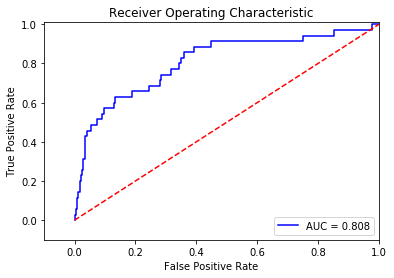

In [46]:
y_pred_3 = model_3.predict(X_test)[:, 0]
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_pred_3)

roc_auc_3 = auc(fpr_3, tpr_3)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_3, tpr_3, 'b',label='AUC = %0.3f'% roc_auc_3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
model_3.save('model3.h5')

## Multibranches

In [51]:
TYPE_1 = ['MARQUE_BMW', 'MARQUE_CHV', 'MARQUE_CIT', 'MARQUE_MAZ', 'MARQUE_SEA', 'MARQUE_VAU']
TYPE_2 = ['MODE_LOGT_2.0', 'MODE_LOGT_nan']
TYPE_3 = ['PRIX_VEH', 'MT_APPORT', 'AGE_CLI']
TYPE_4 = ['DUREE_CONTRAT']

X_trains = [None, None, None, None]
X_tests = [None, None, None, None]
col_groups = [TYPE_1, TYPE_2, TYPE_3, TYPE_4]

for i, col_group in enumerate(col_groups):
    X_trains[i] = scaler.fit_transform(X_train_raw.loc[:, col_group])
    X_tests[i] = scaler.transform(X_test_raw.loc[:, col_group])
    
X_trains[0]

array([[-0.05260037, -0.02808834, -0.03973859, -0.05068197, -0.03140681,
        -0.01404001],
       [-0.05260037, -0.02808834, -0.03973859, -0.05068197, -0.03140681,
        -0.01404001],
       [-0.05260037, -0.02808834, -0.03973859, -0.05068197, -0.03140681,
        -0.01404001],
       ...,
       [-0.05260037, -0.02808834, -0.03973859, -0.05068197, -0.03140681,
        -0.01404001],
       [-0.05260037, -0.02808834, -0.03973859, -0.05068197, -0.03140681,
        -0.01404001],
       [-0.05260037, -0.02808834, -0.03973859, -0.05068197, -0.03140681,
        -0.01404001]])

In [61]:
penalties = [regularizers.l1(1e-5), regularizers.l1(1e-4), regularizers.l1(1e-3), regularizers.l1(1e-2)]
dropout_ratio = [0.25, 0.33, 0.4]

test_results = []
best_test_result = 0
best_test_index = 0
best_dropout_ratio = 0.25

for i, p in enumerate(penalties):
    for d in dropout_ratio:
        np.random.seed(RANDOM_SEED)
        tf.set_random_seed(RANDOM_SEED)
        
        print('Regularizer', i, ', dropout ratio', d, ':')

        Tensor_X_1_I = Input(shape = (len(TYPE_1),))
        Tensor_X_1 = Dense(units = 8, kernel_initializer = glorot_uniform(seed=RANDOM_SEED)) (Tensor_X_1_I)

        Tensor_X_2_I = Input(shape = (len(TYPE_2),))
        Tensor_X_2 = Dense(units = 8, kernel_initializer = glorot_uniform(seed=RANDOM_SEED)) (Tensor_X_2_I)

        Tensor_X_3_I = Input(shape = (len(TYPE_3),))
        Tensor_X_3 = Dense(units = 8, kernel_initializer = glorot_uniform(seed=RANDOM_SEED)) (Tensor_X_3_I)

        Tensor_X_4_I = Input(shape = (len(TYPE_4),))
        Tensor_X_4 = Dense(units = 8, kernel_initializer = glorot_uniform(seed=RANDOM_SEED)) (Tensor_X_4_I)

        Tensor_X = Concatenate(name = 'concat') ([Tensor_X_1, Tensor_X_2, Tensor_X_3, Tensor_X_4])
        Tensor_X = Dense(units = 32, kernel_initializer = glorot_uniform(seed=RANDOM_SEED), kernel_regularizer=p) (Tensor_X)
        Tensor_X = Activation('relu') (Tensor_X)
        Tensor_X = Dropout(d, seed = RANDOM_SEED) (Tensor_X)
        Tensor_X = Dense(units = 1, kernel_initializer = glorot_uniform(seed=RANDOM_SEED), kernel_regularizer=p) (Tensor_X)
        Tensor_X = Activation('sigmoid') (Tensor_X)

        model_4 = Model(inputs = [Tensor_X_1_I, Tensor_X_2_I, Tensor_X_3_I, Tensor_X_4_I], outputs = Tensor_X)
        
        adam = Adam()
        model_4.compile(loss="binary_crossentropy", optimizer = adam, metrics=[auc_metric])
        history_4 = model_4.fit(X_trains, y_train, batch_size=128, epochs=20, verbose=0, validation_split=0.2)
        print('auc: ', history_4.history['auc'][-1], '. val_auc: ', history_4.history['val_auc'][-1])
        if history_4.history['val_auc'][-1] > best_test_result:
            best_test_result = history_4.history['val_auc'][-1]
            best_test_index = i
            best_dropout_ratio = d

# 4 4 8 4 32 0.4 256 -> 0.822
# 8 8 8 8 32 0.33 256 -> 0.819

Regularizer 0 , dropout ratio 0.25 :
auc:  0.573170376986992 . val_auc:  0.5754068677061297
Regularizer 0 , dropout ratio 0.33 :
auc:  0.5667396201292086 . val_auc:  0.5686850558360809
Regularizer 0 , dropout ratio 0.4 :
auc:  0.5609954633011434 . val_auc:  0.5631080204630133
Regularizer 1 , dropout ratio 0.25 :
auc:  0.5714333069151215 . val_auc:  0.5736043194831886
Regularizer 1 , dropout ratio 0.33 :
auc:  0.5651918809441517 . val_auc:  0.5669335899094643
Regularizer 1 , dropout ratio 0.4 :
auc:  0.5612635199411011 . val_auc:  0.5633209308967214
Regularizer 2 , dropout ratio 0.25 :
auc:  0.562918818695964 . val_auc:  0.5652521431739694
Regularizer 2 , dropout ratio 0.33 :
auc:  0.5562334539826265 . val_auc:  0.5577799741270507
Regularizer 2 , dropout ratio 0.4 :
auc:  0.5496052202845947 . val_auc:  0.5512252139927718
Regularizer 3 , dropout ratio 0.25 :
auc:  0.5512576478547901 . val_auc:  0.5529583659665338
Regularizer 3 , dropout ratio 0.33 :
auc:  0.5503228306770325 . val_auc:  0

In [71]:
np.random.seed(RANDOM_SEED)
tf.set_random_seed(RANDOM_SEED)

Tensor_X_1_I = Input(shape = (len(TYPE_1),))
Tensor_X_1 = Dense(units = 8, kernel_initializer = glorot_uniform(seed=RANDOM_SEED)) (Tensor_X_1_I)

Tensor_X_2_I = Input(shape = (len(TYPE_2),))
Tensor_X_2 = Dense(units = 8, kernel_initializer = glorot_uniform(seed=RANDOM_SEED)) (Tensor_X_2_I)

Tensor_X_3_I = Input(shape = (len(TYPE_3),))
Tensor_X_3 = Dense(units = 8, kernel_initializer = glorot_uniform(seed=RANDOM_SEED)) (Tensor_X_3_I)

Tensor_X_4_I = Input(shape = (len(TYPE_4),))
Tensor_X_4 = Dense(units = 8, kernel_initializer = glorot_uniform(seed=RANDOM_SEED)) (Tensor_X_4_I)

Tensor_X = Concatenate(name = 'concat') ([Tensor_X_1, Tensor_X_2, Tensor_X_3, Tensor_X_4])
Tensor_X = Dense(units = 32, kernel_initializer = glorot_uniform(seed=0), kernel_regularizer=penalties[best_test_index]) (Tensor_X)
Tensor_X = Activation('relu') (Tensor_X)
Tensor_X = Dropout(best_dropout_ratio , seed = RANDOM_SEED) (Tensor_X)
Tensor_X = Dense(units = 1, kernel_initializer = glorot_uniform(seed=RANDOM_SEED), kernel_regularizer=penalties[best_test_index]) (Tensor_X)
Tensor_X = Activation('sigmoid') (Tensor_X)

model_4 = Model(inputs = [Tensor_X_1_I, Tensor_X_2_I, Tensor_X_3_I, Tensor_X_4_I], outputs = Tensor_X)
        
adam = Adam()
model_4.compile(loss="binary_crossentropy", optimizer = adam, metrics=[auc_metric])
history_4 = model_4.fit(X_trains, y_train, batch_size=256, epochs=1000, verbose=2, validation_split=0.2)

Train on 4059 samples, validate on 1015 samples
Epoch 1/1000
 - 9s - loss: 0.5392 - auc: 0.4137 - val_loss: 0.4795 - val_auc: 0.4701
Epoch 2/1000
 - 0s - loss: 0.3894 - auc: 0.4649 - val_loss: 0.3535 - val_auc: 0.4876
Epoch 3/1000
 - 0s - loss: 0.2824 - auc: 0.4763 - val_loss: 0.2662 - val_auc: 0.4812
Epoch 4/1000
 - 0s - loss: 0.2101 - auc: 0.4807 - val_loss: 0.2073 - val_auc: 0.4812
Epoch 5/1000
 - 0s - loss: 0.1592 - auc: 0.4762 - val_loss: 0.1711 - val_auc: 0.4842
Epoch 6/1000
 - 0s - loss: 0.1234 - auc: 0.4819 - val_loss: 0.1479 - val_auc: 0.4893
Epoch 7/1000
 - 0s - loss: 0.1067 - auc: 0.4881 - val_loss: 0.1348 - val_auc: 0.4895
Epoch 8/1000
 - 0s - loss: 0.0925 - auc: 0.4886 - val_loss: 0.1275 - val_auc: 0.4917
Epoch 9/1000
 - 0s - loss: 0.0810 - auc: 0.4896 - val_loss: 0.1233 - val_auc: 0.4949
Epoch 10/1000
 - 0s - loss: 0.0787 - auc: 0.4929 - val_loss: 0.1209 - val_auc: 0.4960
Epoch 11/1000
 - 0s - loss: 0.0758 - auc: 0.4968 - val_loss: 0.1197 - val_auc: 0.4983
Epoch 12/1000
 

Epoch 96/1000
 - 0s - loss: 0.0550 - auc: 0.6368 - val_loss: 0.1202 - val_auc: 0.6370
Epoch 97/1000
 - 0s - loss: 0.0535 - auc: 0.6373 - val_loss: 0.1205 - val_auc: 0.6377
Epoch 98/1000
 - 0s - loss: 0.0556 - auc: 0.6379 - val_loss: 0.1212 - val_auc: 0.6380
Epoch 99/1000
 - 0s - loss: 0.0533 - auc: 0.6382 - val_loss: 0.1214 - val_auc: 0.6385
Epoch 100/1000
 - 0s - loss: 0.0542 - auc: 0.6388 - val_loss: 0.1216 - val_auc: 0.6392
Epoch 101/1000
 - 0s - loss: 0.0531 - auc: 0.6396 - val_loss: 0.1218 - val_auc: 0.6398
Epoch 102/1000
 - 0s - loss: 0.0558 - auc: 0.6400 - val_loss: 0.1214 - val_auc: 0.6400
Epoch 103/1000
 - 0s - loss: 0.0534 - auc: 0.6403 - val_loss: 0.1207 - val_auc: 0.6404
Epoch 104/1000
 - 0s - loss: 0.0516 - auc: 0.6408 - val_loss: 0.1215 - val_auc: 0.6412
Epoch 105/1000
 - 0s - loss: 0.0536 - auc: 0.6414 - val_loss: 0.1217 - val_auc: 0.6417
Epoch 106/1000
 - 0s - loss: 0.0556 - auc: 0.6417 - val_loss: 0.1212 - val_auc: 0.6418
Epoch 107/1000
 - 0s - loss: 0.0532 - auc: 0.64

Epoch 191/1000
 - 0s - loss: 0.0522 - auc: 0.6633 - val_loss: 0.1248 - val_auc: 0.6635
Epoch 192/1000
 - 0s - loss: 0.0519 - auc: 0.6636 - val_loss: 0.1247 - val_auc: 0.6637
Epoch 193/1000
 - 0s - loss: 0.0510 - auc: 0.6637 - val_loss: 0.1244 - val_auc: 0.6639
Epoch 194/1000
 - 0s - loss: 0.0508 - auc: 0.6640 - val_loss: 0.1250 - val_auc: 0.6642
Epoch 195/1000
 - 0s - loss: 0.0538 - auc: 0.6641 - val_loss: 0.1250 - val_auc: 0.6642
Epoch 196/1000
 - 0s - loss: 0.0511 - auc: 0.6642 - val_loss: 0.1244 - val_auc: 0.6643
Epoch 197/1000
 - 0s - loss: 0.0518 - auc: 0.6644 - val_loss: 0.1247 - val_auc: 0.6645
Epoch 198/1000
 - 0s - loss: 0.0509 - auc: 0.6645 - val_loss: 0.1245 - val_auc: 0.6647
Epoch 199/1000
 - 0s - loss: 0.0519 - auc: 0.6648 - val_loss: 0.1244 - val_auc: 0.6650
Epoch 200/1000
 - 0s - loss: 0.0538 - auc: 0.6650 - val_loss: 0.1245 - val_auc: 0.6650
Epoch 201/1000
 - 0s - loss: 0.0513 - auc: 0.6651 - val_loss: 0.1240 - val_auc: 0.6653
Epoch 202/1000
 - 0s - loss: 0.0496 - auc: 

 - 0s - loss: 0.0510 - auc: 0.6769 - val_loss: 0.1254 - val_auc: 0.6770
Epoch 286/1000
 - 0s - loss: 0.0494 - auc: 0.6771 - val_loss: 0.1258 - val_auc: 0.6771
Epoch 287/1000
 - 0s - loss: 0.0518 - auc: 0.6771 - val_loss: 0.1258 - val_auc: 0.6771
Epoch 288/1000
 - 0s - loss: 0.0518 - auc: 0.6772 - val_loss: 0.1264 - val_auc: 0.6772
Epoch 289/1000
 - 0s - loss: 0.0494 - auc: 0.6772 - val_loss: 0.1259 - val_auc: 0.6773
Epoch 290/1000
 - 0s - loss: 0.0493 - auc: 0.6774 - val_loss: 0.1263 - val_auc: 0.6775
Epoch 291/1000
 - 0s - loss: 0.0528 - auc: 0.6776 - val_loss: 0.1271 - val_auc: 0.6775
Epoch 292/1000
 - 0s - loss: 0.0499 - auc: 0.6776 - val_loss: 0.1255 - val_auc: 0.6777
Epoch 293/1000
 - 0s - loss: 0.0510 - auc: 0.6778 - val_loss: 0.1254 - val_auc: 0.6778
Epoch 294/1000
 - 0s - loss: 0.0529 - auc: 0.6778 - val_loss: 0.1256 - val_auc: 0.6778
Epoch 295/1000
 - 0s - loss: 0.0525 - auc: 0.6778 - val_loss: 0.1246 - val_auc: 0.6778
Epoch 296/1000
 - 0s - loss: 0.0503 - auc: 0.6779 - val_lo

Epoch 380/1000
 - 0s - loss: 0.0500 - auc: 0.6861 - val_loss: 0.1279 - val_auc: 0.6862
Epoch 381/1000
 - 0s - loss: 0.0497 - auc: 0.6862 - val_loss: 0.1282 - val_auc: 0.6862
Epoch 382/1000
 - 0s - loss: 0.0489 - auc: 0.6863 - val_loss: 0.1282 - val_auc: 0.6863
Epoch 383/1000
 - 0s - loss: 0.0485 - auc: 0.6863 - val_loss: 0.1278 - val_auc: 0.6864
Epoch 384/1000
 - 0s - loss: 0.0489 - auc: 0.6865 - val_loss: 0.1283 - val_auc: 0.6865
Epoch 385/1000
 - 0s - loss: 0.0502 - auc: 0.6865 - val_loss: 0.1281 - val_auc: 0.6866
Epoch 386/1000
 - 0s - loss: 0.0491 - auc: 0.6866 - val_loss: 0.1280 - val_auc: 0.6867
Epoch 387/1000
 - 0s - loss: 0.0500 - auc: 0.6867 - val_loss: 0.1279 - val_auc: 0.6868
Epoch 388/1000
 - 0s - loss: 0.0535 - auc: 0.6867 - val_loss: 0.1274 - val_auc: 0.6867
Epoch 389/1000
 - 0s - loss: 0.0493 - auc: 0.6867 - val_loss: 0.1277 - val_auc: 0.6868
Epoch 390/1000
 - 0s - loss: 0.0486 - auc: 0.6868 - val_loss: 0.1275 - val_auc: 0.6869
Epoch 391/1000
 - 0s - loss: 0.0520 - auc: 

 - 0s - loss: 0.0500 - auc: 0.6929 - val_loss: 0.1275 - val_auc: 0.6929
Epoch 475/1000
 - 0s - loss: 0.0488 - auc: 0.6929 - val_loss: 0.1279 - val_auc: 0.6929
Epoch 476/1000
 - 0s - loss: 0.0495 - auc: 0.6930 - val_loss: 0.1268 - val_auc: 0.6930
Epoch 477/1000
 - 0s - loss: 0.0500 - auc: 0.6930 - val_loss: 0.1278 - val_auc: 0.6930
Epoch 478/1000
 - 0s - loss: 0.0507 - auc: 0.6930 - val_loss: 0.1267 - val_auc: 0.6930
Epoch 479/1000
 - 0s - loss: 0.0491 - auc: 0.6930 - val_loss: 0.1269 - val_auc: 0.6930
Epoch 480/1000
 - 0s - loss: 0.0484 - auc: 0.6930 - val_loss: 0.1270 - val_auc: 0.6931
Epoch 481/1000
 - 0s - loss: 0.0478 - auc: 0.6932 - val_loss: 0.1272 - val_auc: 0.6932
Epoch 482/1000
 - 0s - loss: 0.0494 - auc: 0.6932 - val_loss: 0.1270 - val_auc: 0.6933
Epoch 483/1000
 - 0s - loss: 0.0517 - auc: 0.6933 - val_loss: 0.1272 - val_auc: 0.6933
Epoch 484/1000
 - 0s - loss: 0.0476 - auc: 0.6933 - val_loss: 0.1267 - val_auc: 0.6934
Epoch 485/1000
 - 0s - loss: 0.0493 - auc: 0.6933 - val_lo

Epoch 569/1000
 - 0s - loss: 0.0489 - auc: 0.6980 - val_loss: 0.1215 - val_auc: 0.6981
Epoch 570/1000
 - 0s - loss: 0.0477 - auc: 0.6981 - val_loss: 0.1199 - val_auc: 0.6981
Epoch 571/1000
 - 0s - loss: 0.0484 - auc: 0.6982 - val_loss: 0.1204 - val_auc: 0.6982
Epoch 572/1000
 - 0s - loss: 0.0496 - auc: 0.6982 - val_loss: 0.1196 - val_auc: 0.6982
Epoch 573/1000
 - 0s - loss: 0.0484 - auc: 0.6982 - val_loss: 0.1202 - val_auc: 0.6982
Epoch 574/1000
 - 0s - loss: 0.0482 - auc: 0.6982 - val_loss: 0.1194 - val_auc: 0.6982
Epoch 575/1000
 - 0s - loss: 0.0490 - auc: 0.6982 - val_loss: 0.1192 - val_auc: 0.6983
Epoch 576/1000
 - 0s - loss: 0.0483 - auc: 0.6983 - val_loss: 0.1194 - val_auc: 0.6983
Epoch 577/1000
 - 0s - loss: 0.0478 - auc: 0.6983 - val_loss: 0.1189 - val_auc: 0.6984
Epoch 578/1000
 - 0s - loss: 0.0483 - auc: 0.6984 - val_loss: 0.1189 - val_auc: 0.6985
Epoch 579/1000
 - 0s - loss: 0.0483 - auc: 0.6985 - val_loss: 0.1194 - val_auc: 0.6985
Epoch 580/1000
 - 0s - loss: 0.0473 - auc: 

 - 0s - loss: 0.0487 - auc: 0.7028 - val_loss: 0.1164 - val_auc: 0.7028
Epoch 664/1000
 - 0s - loss: 0.0501 - auc: 0.7028 - val_loss: 0.1149 - val_auc: 0.7029
Epoch 665/1000
 - 0s - loss: 0.0475 - auc: 0.7029 - val_loss: 0.1155 - val_auc: 0.7029
Epoch 666/1000
 - 0s - loss: 0.0449 - auc: 0.7030 - val_loss: 0.1153 - val_auc: 0.7030
Epoch 667/1000
 - 0s - loss: 0.0475 - auc: 0.7031 - val_loss: 0.1162 - val_auc: 0.7031
Epoch 668/1000
 - 0s - loss: 0.0483 - auc: 0.7031 - val_loss: 0.1148 - val_auc: 0.7031
Epoch 669/1000
 - 0s - loss: 0.0479 - auc: 0.7032 - val_loss: 0.1157 - val_auc: 0.7032
Epoch 670/1000
 - 0s - loss: 0.0459 - auc: 0.7032 - val_loss: 0.1160 - val_auc: 0.7033
Epoch 671/1000
 - 0s - loss: 0.0467 - auc: 0.7033 - val_loss: 0.1167 - val_auc: 0.7034
Epoch 672/1000
 - 0s - loss: 0.0496 - auc: 0.7034 - val_loss: 0.1156 - val_auc: 0.7034
Epoch 673/1000
 - 0s - loss: 0.0473 - auc: 0.7034 - val_loss: 0.1173 - val_auc: 0.7035
Epoch 674/1000
 - 0s - loss: 0.0465 - auc: 0.7035 - val_lo

Epoch 758/1000
 - 0s - loss: 0.0479 - auc: 0.7080 - val_loss: 0.1155 - val_auc: 0.7080
Epoch 759/1000
 - 0s - loss: 0.0483 - auc: 0.7080 - val_loss: 0.1154 - val_auc: 0.7081
Epoch 760/1000
 - 0s - loss: 0.0479 - auc: 0.7081 - val_loss: 0.1151 - val_auc: 0.7081
Epoch 761/1000
 - 0s - loss: 0.0474 - auc: 0.7081 - val_loss: 0.1157 - val_auc: 0.7082
Epoch 762/1000
 - 0s - loss: 0.0470 - auc: 0.7082 - val_loss: 0.1148 - val_auc: 0.7082
Epoch 763/1000
 - 0s - loss: 0.0469 - auc: 0.7082 - val_loss: 0.1146 - val_auc: 0.7083
Epoch 764/1000
 - 0s - loss: 0.0471 - auc: 0.7083 - val_loss: 0.1158 - val_auc: 0.7084
Epoch 765/1000
 - 0s - loss: 0.0462 - auc: 0.7084 - val_loss: 0.1171 - val_auc: 0.7084
Epoch 766/1000
 - 0s - loss: 0.0482 - auc: 0.7084 - val_loss: 0.1162 - val_auc: 0.7085
Epoch 767/1000
 - 0s - loss: 0.0487 - auc: 0.7085 - val_loss: 0.1163 - val_auc: 0.7085
Epoch 768/1000
 - 0s - loss: 0.0470 - auc: 0.7085 - val_loss: 0.1157 - val_auc: 0.7085
Epoch 769/1000
 - 0s - loss: 0.0449 - auc: 

 - 0s - loss: 0.0470 - auc: 0.7126 - val_loss: 0.1122 - val_auc: 0.7127
Epoch 853/1000
 - 0s - loss: 0.0454 - auc: 0.7127 - val_loss: 0.1125 - val_auc: 0.7127
Epoch 854/1000
 - 0s - loss: 0.0478 - auc: 0.7128 - val_loss: 0.1115 - val_auc: 0.7128
Epoch 855/1000
 - 0s - loss: 0.0470 - auc: 0.7128 - val_loss: 0.1124 - val_auc: 0.7128
Epoch 856/1000
 - 0s - loss: 0.0473 - auc: 0.7128 - val_loss: 0.1125 - val_auc: 0.7129
Epoch 857/1000
 - 0s - loss: 0.0448 - auc: 0.7129 - val_loss: 0.1122 - val_auc: 0.7130
Epoch 858/1000
 - 0s - loss: 0.0496 - auc: 0.7129 - val_loss: 0.1115 - val_auc: 0.7129
Epoch 859/1000
 - 0s - loss: 0.0462 - auc: 0.7130 - val_loss: 0.1117 - val_auc: 0.7130
Epoch 860/1000
 - 0s - loss: 0.0481 - auc: 0.7130 - val_loss: 0.1123 - val_auc: 0.7130
Epoch 861/1000
 - 0s - loss: 0.0488 - auc: 0.7131 - val_loss: 0.1131 - val_auc: 0.7131
Epoch 862/1000
 - 0s - loss: 0.0479 - auc: 0.7131 - val_loss: 0.1126 - val_auc: 0.7131
Epoch 863/1000
 - 0s - loss: 0.0467 - auc: 0.7131 - val_lo

Epoch 947/1000
 - 0s - loss: 0.0466 - auc: 0.7168 - val_loss: 0.1113 - val_auc: 0.7168
Epoch 948/1000
 - 0s - loss: 0.0475 - auc: 0.7168 - val_loss: 0.1114 - val_auc: 0.7168
Epoch 949/1000
 - 0s - loss: 0.0472 - auc: 0.7169 - val_loss: 0.1121 - val_auc: 0.7169
Epoch 950/1000
 - 0s - loss: 0.0473 - auc: 0.7169 - val_loss: 0.1121 - val_auc: 0.7169
Epoch 951/1000
 - 0s - loss: 0.0467 - auc: 0.7169 - val_loss: 0.1117 - val_auc: 0.7170
Epoch 952/1000
 - 0s - loss: 0.0475 - auc: 0.7170 - val_loss: 0.1121 - val_auc: 0.7170
Epoch 953/1000
 - 0s - loss: 0.0462 - auc: 0.7170 - val_loss: 0.1114 - val_auc: 0.7171
Epoch 954/1000
 - 0s - loss: 0.0466 - auc: 0.7171 - val_loss: 0.1111 - val_auc: 0.7171
Epoch 955/1000
 - 0s - loss: 0.0470 - auc: 0.7171 - val_loss: 0.1117 - val_auc: 0.7171
Epoch 956/1000
 - 0s - loss: 0.0473 - auc: 0.7172 - val_loss: 0.1119 - val_auc: 0.7172
Epoch 957/1000
 - 0s - loss: 0.0453 - auc: 0.7172 - val_loss: 0.1123 - val_auc: 0.7172
Epoch 958/1000
 - 0s - loss: 0.0479 - auc: 

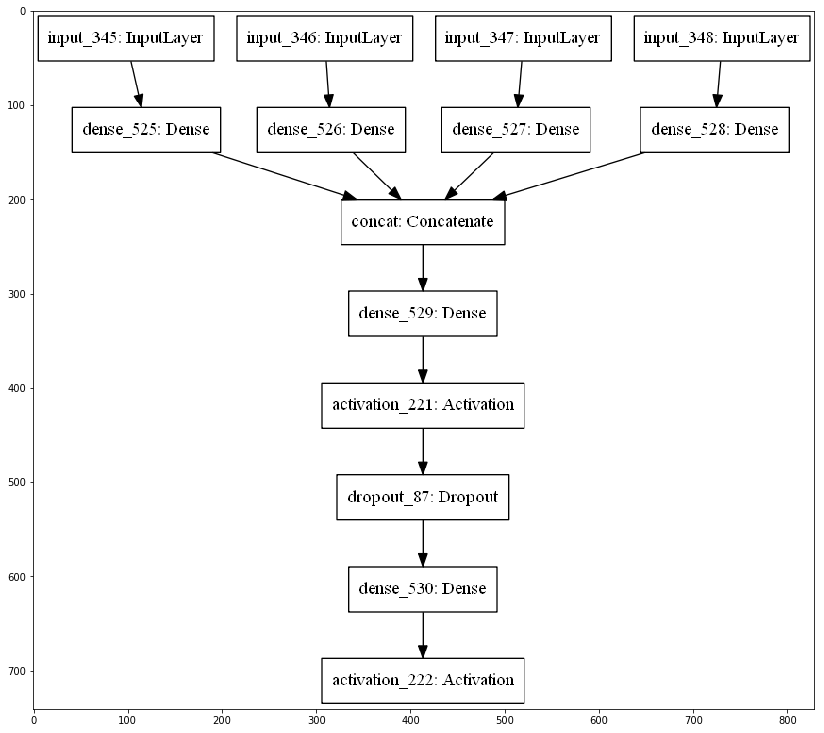

In [72]:
from keras.utils import plot_model

plot_model(model_4, to_file='model4.png')

plt.figure(figsize = (14,14))
plt.imshow(plt.imread('model4.png'))

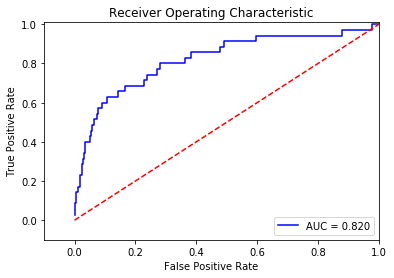

In [73]:
y_pred_4 = model_4.predict(X_tests)[:, 0]
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, y_pred_4)

roc_auc_4 = auc(fpr_4, tpr_4)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_4, tpr_4, 'b',label='AUC = %0.3f'% roc_auc_4)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
model_4.save('model_4.h5')

## Multibranches (cont'd)

In [76]:
TYPE_1 = ['MARQUE_BMW', 'MARQUE_CHV', 'MARQUE_CIT', 'MARQUE_MAZ', 'MARQUE_SEA', 'MARQUE_VAU']
TYPE_2 = ['MODE_LOGT_2.0', 'MODE_LOGT_nan']
TYPE_3 = ['PRIX_VEH', 'MT_APPORT', 'AGE_CLI']
TYPE_4 = ['DUREE_CONTRAT']

np.random.seed(RANDOM_SEED)
tf.set_random_seed(RANDOM_SEED)


Tensor_X_1_I = Input(shape = (len(TYPE_1),), name = 'input_1')

Tensor_X_2_I = Input(shape = (len(TYPE_2),), name = 'input_2')

Tensor_X_3_I = Input(shape = (len(TYPE_3),), name = 'input_3')
Tensor_X_3 = Dense(units = 16, kernel_initializer = glorot_uniform(seed=RANDOM_SEED)) (Tensor_X_3_I)

Tensor_X_4_I = Input(shape = (len(TYPE_4),), name = 'input_4')

Tensor_X = Concatenate(name = 'concat') ([Tensor_X_1_I, Tensor_X_2_I, Tensor_X_3, Tensor_X_4_I])
Tensor_X = Dense(units = 32, name = 'dense_1', kernel_initializer = glorot_uniform(seed=RANDOM_SEED), kernel_regularizer=regularizers.l1(1e-4)) (Tensor_X)
Tensor_X = Activation('relu', name = 'relu') (Tensor_X)
Tensor_X = Dropout(0.4, seed = RANDOM_SEED, name = 'dropout') (Tensor_X)
Tensor_X = Dense(units = 1, name = 'dense_2', kernel_initializer = glorot_uniform(seed=RANDOM_SEED), kernel_regularizer=regularizers.l1(1e-5)) (Tensor_X)
Tensor_X = Activation('sigmoid') (Tensor_X)

model_5 = Model(inputs = [Tensor_X_1_I, Tensor_X_2_I, Tensor_X_3_I, Tensor_X_4_I], outputs = Tensor_X)
model_5.summary()

# 0.00001

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
dense_537 (Dense)               (None, 16)           64          input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (I

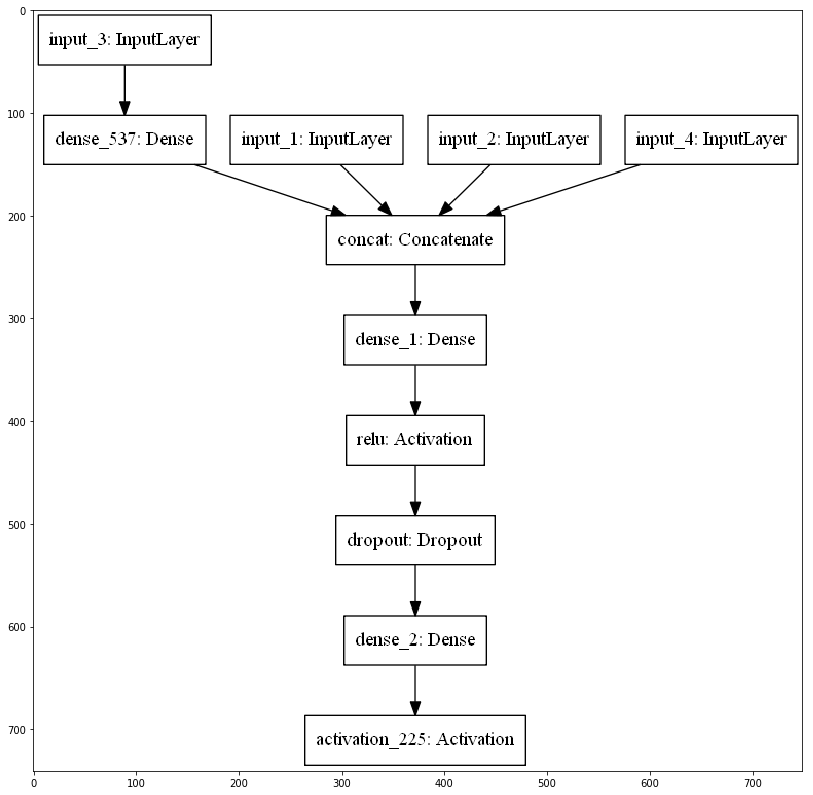

In [77]:
plot_model(model_5, to_file='model5.png')

plt.figure(figsize = (14,14))
plt.imshow(plt.imread('model5.png'))

In [78]:
from keras.optimizers import SGD, Adam
sgd = Adam()

model_5.compile(loss="binary_crossentropy", optimizer = sgd, metrics=[auc_metric])
history_5 = model_5.fit(X_trains, y_train, batch_size=256, epochs=1000, verbose=1, validation_split=0.2, shuffle=False)

Train on 4059 samples, validate on 1015 samples
Epoch 1/1000
4059/4059 [==============================] - 8s 2ms/step - loss: 0.5705 - auc: 0.3144 - val_loss: 0.4608 - val_auc: 0.3381
Epoch 2/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.4480 - auc: 0.3429 - val_loss: 0.3569 - val_auc: 0.3493
Epoch 3/1000
4059/4059 [==============================] - 0s 28us/step - loss: 0.3473 - auc: 0.3561 - val_loss: 0.2845 - val_auc: 0.3689
Epoch 4/1000
4059/4059 [==============================] - 0s 29us/step - loss: 0.2786 - auc: 0.3659 - val_loss: 0.2352 - val_auc: 0.3692
Epoch 5/1000
4059/4059 [==============================] - 0s 29us/step - loss: 0.2283 - auc: 0.3690 - val_loss: 0.2017 - val_auc: 0.3749
Epoch 6/1000
4059/4059 [==============================] - 0s 29us/step - loss: 0.1925 - auc: 0.3810 - val_loss: 0.1788 - val_auc: 0.3861
Epoch 7/1000
4059/4059 [==============================] - 0s 28us/step - loss: 0.1718 - auc: 0.3879 - val_loss: 0.1630 - val_auc: 0

4059/4059 [==============================] - 0s 37us/step - loss: 0.0716 - auc: 0.5673 - val_loss: 0.1151 - val_auc: 0.5680
Epoch 61/1000
4059/4059 [==============================] - 0s 34us/step - loss: 0.0659 - auc: 0.5689 - val_loss: 0.1156 - val_auc: 0.5700
Epoch 62/1000
4059/4059 [==============================] - 0s 37us/step - loss: 0.0689 - auc: 0.5707 - val_loss: 0.1156 - val_auc: 0.5716
Epoch 63/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0698 - auc: 0.5722 - val_loss: 0.1156 - val_auc: 0.5729
Epoch 64/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0700 - auc: 0.5734 - val_loss: 0.1158 - val_auc: 0.5744
Epoch 65/1000
4059/4059 [==============================] - 0s 41us/step - loss: 0.0676 - auc: 0.5750 - val_loss: 0.1160 - val_auc: 0.5756
Epoch 66/1000
4059/4059 [==============================] - 0s 41us/step - loss: 0.0658 - auc: 0.5760 - val_loss: 0.1155 - val_auc: 0.5768
Epoch 67/1000
4059/4059 [=======================

4059/4059 [==============================] - 0s 36us/step - loss: 0.0600 - auc: 0.6448 - val_loss: 0.1098 - val_auc: 0.6450
Epoch 179/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0587 - auc: 0.6451 - val_loss: 0.1096 - val_auc: 0.6453
Epoch 180/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0577 - auc: 0.6454 - val_loss: 0.1094 - val_auc: 0.6456
Epoch 181/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0582 - auc: 0.6457 - val_loss: 0.1096 - val_auc: 0.6459
Epoch 182/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0565 - auc: 0.6460 - val_loss: 0.1094 - val_auc: 0.6462
Epoch 183/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0564 - auc: 0.6464 - val_loss: 0.1096 - val_auc: 0.6466
Epoch 184/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0571 - auc: 0.6468 - val_loss: 0.1099 - val_auc: 0.6469
Epoch 185/1000
4059/4059 [================

4059/4059 [==============================] - 0s 30us/step - loss: 0.0550 - auc: 0.6610 - val_loss: 0.1078 - val_auc: 0.6612
Epoch 238/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0571 - auc: 0.6612 - val_loss: 0.1073 - val_auc: 0.6613
Epoch 239/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0562 - auc: 0.6614 - val_loss: 0.1068 - val_auc: 0.6615
Epoch 240/1000
4059/4059 [==============================] - 0s 28us/step - loss: 0.0580 - auc: 0.6615 - val_loss: 0.1064 - val_auc: 0.6615
Epoch 241/1000
4059/4059 [==============================] - 0s 26us/step - loss: 0.0576 - auc: 0.6615 - val_loss: 0.1061 - val_auc: 0.6617
Epoch 242/1000
4059/4059 [==============================] - 0s 34us/step - loss: 0.0551 - auc: 0.6618 - val_loss: 0.1062 - val_auc: 0.6620
Epoch 243/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0548 - auc: 0.6621 - val_loss: 0.1067 - val_auc: 0.6622
Epoch 244/1000
4059/4059 [================

Epoch 296/1000
4059/4059 [==============================] - 0s 34us/step - loss: 0.0550 - auc: 0.6713 - val_loss: 0.1055 - val_auc: 0.6714
Epoch 297/1000
4059/4059 [==============================] - 0s 29us/step - loss: 0.0538 - auc: 0.6715 - val_loss: 0.1054 - val_auc: 0.6716
Epoch 298/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0549 - auc: 0.6716 - val_loss: 0.1053 - val_auc: 0.6717
Epoch 299/1000
4059/4059 [==============================] - 0s 27us/step - loss: 0.0537 - auc: 0.6718 - val_loss: 0.1052 - val_auc: 0.6719
Epoch 300/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0560 - auc: 0.6719 - val_loss: 0.1050 - val_auc: 0.6720
Epoch 301/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0544 - auc: 0.6721 - val_loss: 0.1053 - val_auc: 0.6722
Epoch 302/1000
4059/4059 [==============================] - 0s 29us/step - loss: 0.0551 - auc: 0.6722 - val_loss: 0.1053 - val_auc: 0.6723
Epoch 303/1000
4059/4059 [=

Epoch 355/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0540 - auc: 0.6799 - val_loss: 0.1059 - val_auc: 0.6800
Epoch 356/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0525 - auc: 0.6801 - val_loss: 0.1060 - val_auc: 0.6802
Epoch 357/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0544 - auc: 0.6802 - val_loss: 0.1061 - val_auc: 0.6803
Epoch 358/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0552 - auc: 0.6803 - val_loss: 0.1059 - val_auc: 0.6803
Epoch 359/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0542 - auc: 0.6804 - val_loss: 0.1058 - val_auc: 0.6805
Epoch 360/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0541 - auc: 0.6805 - val_loss: 0.1060 - val_auc: 0.6806
Epoch 361/1000
4059/4059 [==============================] - 0s 29us/step - loss: 0.0541 - auc: 0.6806 - val_loss: 0.1058 - val_auc: 0.6806
Epoch 362/1000
4059/4059 [=

Epoch 414/1000
4059/4059 [==============================] - 0s 29us/step - loss: 0.0526 - auc: 0.6863 - val_loss: 0.1055 - val_auc: 0.6863
Epoch 415/1000
4059/4059 [==============================] - 0s 35us/step - loss: 0.0522 - auc: 0.6864 - val_loss: 0.1059 - val_auc: 0.6864
Epoch 416/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0542 - auc: 0.6864 - val_loss: 0.1054 - val_auc: 0.6865
Epoch 417/1000
4059/4059 [==============================] - 0s 40us/step - loss: 0.0527 - auc: 0.6865 - val_loss: 0.1049 - val_auc: 0.6865
Epoch 418/1000
4059/4059 [==============================] - 0s 36us/step - loss: 0.0537 - auc: 0.6865 - val_loss: 0.1045 - val_auc: 0.6866
Epoch 419/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0518 - auc: 0.6866 - val_loss: 0.1049 - val_auc: 0.6867
Epoch 420/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0526 - auc: 0.6867 - val_loss: 0.1052 - val_auc: 0.6868
Epoch 421/1000
4059/4059 [=

Epoch 473/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0531 - auc: 0.6916 - val_loss: 0.1058 - val_auc: 0.6916
Epoch 474/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0504 - auc: 0.6917 - val_loss: 0.1061 - val_auc: 0.6917
Epoch 475/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0540 - auc: 0.6917 - val_loss: 0.1058 - val_auc: 0.6918
Epoch 476/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0504 - auc: 0.6918 - val_loss: 0.1058 - val_auc: 0.6919
Epoch 477/1000
4059/4059 [==============================] - 0s 29us/step - loss: 0.0537 - auc: 0.6919 - val_loss: 0.1060 - val_auc: 0.6919
Epoch 478/1000
4059/4059 [==============================] - 0s 34us/step - loss: 0.0531 - auc: 0.6920 - val_loss: 0.1061 - val_auc: 0.6920
Epoch 479/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0515 - auc: 0.6920 - val_loss: 0.1064 - val_auc: 0.6921
Epoch 480/1000
4059/4059 [=

Epoch 532/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0515 - auc: 0.6955 - val_loss: 0.1057 - val_auc: 0.6956
Epoch 533/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0494 - auc: 0.6956 - val_loss: 0.1060 - val_auc: 0.6957
Epoch 534/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0517 - auc: 0.6957 - val_loss: 0.1057 - val_auc: 0.6957
Epoch 535/1000
4059/4059 [==============================] - 0s 34us/step - loss: 0.0525 - auc: 0.6957 - val_loss: 0.1056 - val_auc: 0.6957
Epoch 536/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0498 - auc: 0.6958 - val_loss: 0.1062 - val_auc: 0.6959
Epoch 537/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0538 - auc: 0.6959 - val_loss: 0.1061 - val_auc: 0.6959
Epoch 538/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0522 - auc: 0.6959 - val_loss: 0.1056 - val_auc: 0.6960
Epoch 539/1000
4059/4059 [=

Epoch 591/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0515 - auc: 0.6992 - val_loss: 0.1057 - val_auc: 0.6992
Epoch 592/1000
4059/4059 [==============================] - 0s 35us/step - loss: 0.0517 - auc: 0.6992 - val_loss: 0.1054 - val_auc: 0.6992
Epoch 593/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0517 - auc: 0.6993 - val_loss: 0.1055 - val_auc: 0.6993
Epoch 594/1000
4059/4059 [==============================] - 0s 34us/step - loss: 0.0491 - auc: 0.6994 - val_loss: 0.1064 - val_auc: 0.6994
Epoch 595/1000
4059/4059 [==============================] - 0s 37us/step - loss: 0.0530 - auc: 0.6994 - val_loss: 0.1063 - val_auc: 0.6995
Epoch 596/1000
4059/4059 [==============================] - 0s 37us/step - loss: 0.0540 - auc: 0.6995 - val_loss: 0.1056 - val_auc: 0.6995
Epoch 597/1000
4059/4059 [==============================] - 0s 36us/step - loss: 0.0530 - auc: 0.6995 - val_loss: 0.1047 - val_auc: 0.6995
Epoch 598/1000
4059/4059 [=

Epoch 650/1000
4059/4059 [==============================] - 0s 40us/step - loss: 0.0492 - auc: 0.7019 - val_loss: 0.1058 - val_auc: 0.7020
Epoch 651/1000
4059/4059 [==============================] - 0s 40us/step - loss: 0.0513 - auc: 0.7020 - val_loss: 0.1064 - val_auc: 0.7020
Epoch 652/1000
4059/4059 [==============================] - 0s 37us/step - loss: 0.0499 - auc: 0.7021 - val_loss: 0.1063 - val_auc: 0.7021
Epoch 653/1000
4059/4059 [==============================] - 0s 35us/step - loss: 0.0512 - auc: 0.7021 - val_loss: 0.1059 - val_auc: 0.7021
Epoch 654/1000
4059/4059 [==============================] - 0s 37us/step - loss: 0.0505 - auc: 0.7021 - val_loss: 0.1058 - val_auc: 0.7022
Epoch 655/1000
4059/4059 [==============================] - 0s 37us/step - loss: 0.0500 - auc: 0.7022 - val_loss: 0.1061 - val_auc: 0.7022
Epoch 656/1000
4059/4059 [==============================] - 0s 37us/step - loss: 0.0523 - auc: 0.7023 - val_loss: 0.1061 - val_auc: 0.7023
Epoch 657/1000
4059/4059 [=

4059/4059 [==============================] - 0s 32us/step - loss: 0.0512 - auc: 0.7063 - val_loss: 0.1056 - val_auc: 0.7063
Epoch 768/1000
4059/4059 [==============================] - 0s 34us/step - loss: 0.0508 - auc: 0.7063 - val_loss: 0.1056 - val_auc: 0.7063
Epoch 769/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0515 - auc: 0.7063 - val_loss: 0.1061 - val_auc: 0.7064
Epoch 770/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0520 - auc: 0.7064 - val_loss: 0.1054 - val_auc: 0.7064
Epoch 771/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0516 - auc: 0.7064 - val_loss: 0.1051 - val_auc: 0.7064
Epoch 772/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0510 - auc: 0.7064 - val_loss: 0.1054 - val_auc: 0.7065
Epoch 773/1000
4059/4059 [==============================] - 0s 32us/step - loss: 0.0498 - auc: 0.7065 - val_loss: 0.1056 - val_auc: 0.7065
Epoch 774/1000
4059/4059 [================

4059/4059 [==============================] - 0s 34us/step - loss: 0.0501 - auc: 0.7082 - val_loss: 0.1065 - val_auc: 0.7083
Epoch 827/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0497 - auc: 0.7083 - val_loss: 0.1062 - val_auc: 0.7083
Epoch 828/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0516 - auc: 0.7083 - val_loss: 0.1063 - val_auc: 0.7083
Epoch 829/1000
4059/4059 [==============================] - 0s 28us/step - loss: 0.0515 - auc: 0.7083 - val_loss: 0.1065 - val_auc: 0.7083
Epoch 830/1000
4059/4059 [==============================] - 0s 25us/step - loss: 0.0494 - auc: 0.7084 - val_loss: 0.1068 - val_auc: 0.7084
Epoch 831/1000
4059/4059 [==============================] - 0s 25us/step - loss: 0.0525 - auc: 0.7084 - val_loss: 0.1065 - val_auc: 0.7084
Epoch 832/1000
4059/4059 [==============================] - 0s 25us/step - loss: 0.0493 - auc: 0.7084 - val_loss: 0.1057 - val_auc: 0.7084
Epoch 833/1000
4059/4059 [================

4059/4059 [==============================] - 0s 34us/step - loss: 0.0489 - auc: 0.7098 - val_loss: 0.1063 - val_auc: 0.7098
Epoch 886/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0490 - auc: 0.7099 - val_loss: 0.1068 - val_auc: 0.7099
Epoch 887/1000
4059/4059 [==============================] - 0s 34us/step - loss: 0.0491 - auc: 0.7099 - val_loss: 0.1067 - val_auc: 0.7099
Epoch 888/1000
4059/4059 [==============================] - 0s 33us/step - loss: 0.0512 - auc: 0.7099 - val_loss: 0.1068 - val_auc: 0.7100
Epoch 889/1000
4059/4059 [==============================] - 0s 31us/step - loss: 0.0507 - auc: 0.7100 - val_loss: 0.1062 - val_auc: 0.7100
Epoch 890/1000
4059/4059 [==============================] - 0s 26us/step - loss: 0.0493 - auc: 0.7100 - val_loss: 0.1062 - val_auc: 0.7100
Epoch 891/1000
4059/4059 [==============================] - 0s 21us/step - loss: 0.0504 - auc: 0.7100 - val_loss: 0.1062 - val_auc: 0.7101
Epoch 892/1000
4059/4059 [================

4059/4059 [==============================] - 0s 26us/step - loss: 0.0485 - auc: 0.7114 - val_loss: 0.1070 - val_auc: 0.7115
Epoch 945/1000
4059/4059 [==============================] - 0s 27us/step - loss: 0.0506 - auc: 0.7114 - val_loss: 0.1069 - val_auc: 0.7115
Epoch 946/1000
4059/4059 [==============================] - 0s 39us/step - loss: 0.0511 - auc: 0.7115 - val_loss: 0.1064 - val_auc: 0.7115
Epoch 947/1000
4059/4059 [==============================] - 0s 34us/step - loss: 0.0514 - auc: 0.7115 - val_loss: 0.1059 - val_auc: 0.7115
Epoch 948/1000
4059/4059 [==============================] - 0s 30us/step - loss: 0.0502 - auc: 0.7115 - val_loss: 0.1059 - val_auc: 0.7115
Epoch 949/1000
4059/4059 [==============================] - 0s 36us/step - loss: 0.0492 - auc: 0.7115 - val_loss: 0.1064 - val_auc: 0.7116
Epoch 950/1000
4059/4059 [==============================] - 0s 38us/step - loss: 0.0511 - auc: 0.7115 - val_loss: 0.1062 - val_auc: 0.7116
Epoch 951/1000
4059/4059 [================

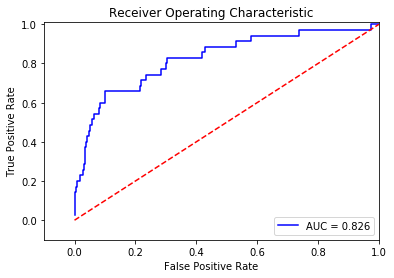

In [79]:
y_pred_5 = model_5.predict(X_tests)[:, 0]
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test, y_pred_5)

roc_auc_5 = auc(fpr_5, tpr_5)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_5, tpr_5, 'b',label='AUC = %0.3f'% roc_auc_5)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## LDA

In [346]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

np.random.seed(RANDOM_SEED)
model_6 = LinearDiscriminantAnalysis()
model_6.fit(X_train_red, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

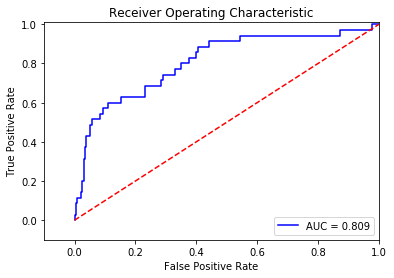

In [347]:
y_pred_6 = model_6.predict_proba(X_test_red)[:, 1]

fpr_6, tpr_6, thresholds_6 = roc_curve(y_test, y_pred_6)

roc_auc_6 = auc(fpr_6, tpr_6)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_6, tpr_6, 'b',label='AUC = %0.3f'% roc_auc_6)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## QDA

C:\Users\ndoannguyen\AppData\Local\Continuum\miniconda3\envs\py35\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


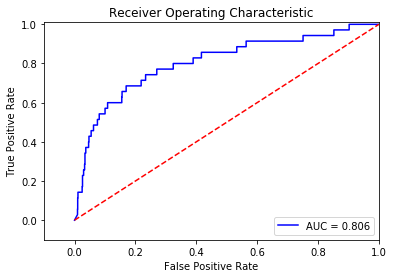

In [348]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

np.random.seed(RANDOM_SEED)
model_7 = QuadraticDiscriminantAnalysis()
model_7.fit(X_train_red, y_train)

y_pred_7 = model_7.predict_proba(X_test_red)[:, 1]

fpr_7, tpr_7, thresholds_7 = roc_curve(y_test, y_pred_7)

roc_auc_7 = auc(fpr_7, tpr_7)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_7, tpr_7, 'b',label='AUC = %0.3f'% roc_auc_7)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree

In [354]:
from sklearn.tree import DecisionTreeClassifier

parameters_8 = {
    'max_depth': [2, 3, 4, 5, 8, 10, 15, 20],
    'max_leaf_nodes': [2, 3, 4, 5, 8, 10, 15, 20],
    'class_weight': [None, 'balanced']   
}

np.random.seed(RANDOM_SEED)

model_8 = DecisionTreeClassifier()
clf_8 = GridSearchCV(model_8, parameters_8, cv=5, verbose=5, n_jobs=4, scoring = 'roc_auc', return_train_score = True)
clf_8.fit(X_train_red, y_train)

result_8 = clf_8.cv_results_ 

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:    3.1s finished


In [355]:
pd.DataFrame([result_8['param_' + param] for param in parameters_8] + [result_8['mean_train_score'], result_8['mean_test_score']], index=list(parameters_8.keys()) + ['mean on train', 'mean_on_test'])

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
max_depth,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,15,15,20,20,20,20,20,20,20,20
max_leaf_nodes,2.000000,3.000000,4.000000,5.000000,8.000000,10.000000,15.000000,20.000000,2.000000,3.000000,...,15,20,2,3,4,5,8,10,15,20
class_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
mean on train,0.509922,0.541773,0.596375,0.611781,0.611781,0.611781,0.611781,0.611781,0.509922,0.541773,...,0.861018,0.889346,0.634317,0.711281,0.748773,0.762919,0.802154,0.824006,0.861018,0.889346
mean_on_test,0.500000,0.503404,0.518027,0.530404,0.530404,0.530404,0.530404,0.530404,0.500000,0.503404,...,0.627608,0.604026,0.552684,0.600175,0.634311,0.616125,0.63898,0.661751,0.627608,0.604026


In [356]:
clf_8.best_params_

{'class_weight': 'balanced', 'max_depth': 8, 'max_leaf_nodes': 10}

In [357]:
np.random.seed(RANDOM_SEED)
model_8_best = DecisionTreeClassifier(max_depth = clf_8.best_params_['max_depth'], max_leaf_nodes=clf_8.best_params_['max_leaf_nodes'], class_weight=clf_8.best_params_['class_weight'])
model_8_best.fit(X_train_red, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

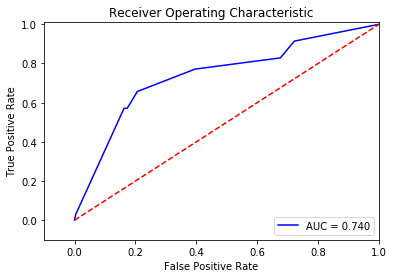

In [358]:
y_pred_8 = model_8_best.predict_proba(X_test_red)[:, 1]

fpr_8, tpr_8, thresholds_8 = roc_curve(y_test, y_pred_8)

roc_auc_8 = auc(fpr_8, tpr_8)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_8, tpr_8, 'b',label='AUC = %0.3f'% roc_auc_8)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Bagging with Decision Trees

In [319]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

parameters_9 = {
    'n_estimators': [5, 10, 20, 40],
    'max_features': [ 0.5, 0.75, 1.0],
    'max_samples': [0.5, 0.75, 1.0]
}

np.random.seed(RANDOM_SEED)

model_9 = BaggingClassifier(DecisionTreeClassifier(max_depth = clf_8.best_params_['max_depth'], max_leaf_nodes=clf_8.best_params_['max_leaf_nodes'], class_weight=clf_8.best_params_['class_weight']), random_state = RANDOM_SEED)
clf_9 = GridSearchCV(model_9, parameters_9, cv=5, verbose=5, n_jobs=4, scoring = 'roc_auc', return_train_score = True)
clf_9.fit(X_train, y_train)

result_9 = clf_9.cv_results_ 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:   10.7s finished


In [320]:
pd.DataFrame([result_9['param_' + param] for param in parameters_9] + [result_9['mean_train_score'], result_9['mean_test_score']], index=list(parameters_9.keys()) + ['mean on train', 'mean_on_test'])

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
max_features,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
n_estimators,5.000000,10.000000,20.000000,40.000000,5.000000,10.000000,20.000000,40.000000,5.000000,10.000000,...,20.000000,40.000000,5.000000,10.000000,20.000000,40.000000,5.000000,10.000000,20.000000,40.000000
max_samples,0.500000,0.500000,0.500000,0.500000,0.750000,0.750000,0.750000,0.750000,1.000000,1.000000,...,0.500000,0.500000,0.750000,0.750000,0.750000,0.750000,1.000000,1.000000,1.000000,1.000000
mean on train,0.857753,0.898645,0.917548,0.931021,0.878606,0.917275,0.927838,0.936844,0.886162,0.925956,...,0.927357,0.935157,0.895510,0.917737,0.928956,0.934975,0.901551,0.922634,0.937092,0.939347
mean_on_test,0.684829,0.746023,0.745171,0.734691,0.697768,0.729330,0.731003,0.726705,0.693661,0.712385,...,0.698794,0.699039,0.655106,0.726092,0.715327,0.716327,0.714690,0.717781,0.712481,0.714097


In [321]:
clf_9.best_params_

{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}

In [327]:
np.random.seed(RANDOM_SEED)
model_9_best = BaggingClassifier(DecisionTreeClassifier(max_depth = clf_8.best_params_['max_depth'], max_leaf_nodes=clf_8.best_params_['max_leaf_nodes'], class_weight=clf_8.best_params_['class_weight']), 
                                max_features = clf_9.best_params_['max_features'], max_samples = clf_9.best_params_['max_samples'], n_estimators = clf_9.best_params_['n_estimators'], random_state = RANDOM_SEED)
model_9_best.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

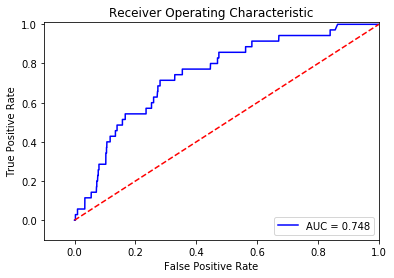

In [328]:
y_pred_9 = model_9_best.predict_proba(X_test)[:, 1]

fpr_9, tpr_9, thresholds_9 = roc_curve(y_test, y_pred_9)

roc_auc_9 = auc(fpr_9, tpr_9)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_9, tpr_9, 'b',label='AUC = %0.3f'% roc_auc_9)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Bagging with Decision Trees - With Dimensionality Reduction

In [324]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

parameters_10 = {
    'n_estimators': [5, 10, 20, 40],
    'max_features': [ 0.5, 0.75, 1.0],
    'max_samples': [0.5, 0.75, 1.0]
}

np.random.seed(RANDOM_SEED)

model_10 = BaggingClassifier(DecisionTreeClassifier(max_depth = clf_8.best_params_['max_depth'], max_leaf_nodes=clf_8.best_params_['max_leaf_nodes'], class_weight=clf_8.best_params_['class_weight']), random_state = RANDOM_SEED)
clf_10 = GridSearchCV(model_10, parameters_10, cv=5, verbose=5, n_jobs=4, scoring = 'roc_auc', return_train_score = True)
clf_10.fit(X_train_red, y_train)

result_10 = clf_10.cv_results_ 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 150 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    5.3s finished


In [325]:
pd.DataFrame([result_10['param_' + param] for param in parameters_10] + [result_10['mean_train_score'], result_10['mean_test_score']], index=list(parameters_10.keys()) + ['mean on train', 'mean_on_test'])

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
max_features,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
n_estimators,5.000000,10.000000,20.000000,40.000000,5.000000,10.000000,20.000000,40.000000,5.000000,10.000000,...,20.000000,40.000000,5.000000,10.000000,20.000000,40.000000,5.000000,10.000000,20.000000,40.000000
max_samples,0.500000,0.500000,0.500000,0.500000,0.750000,0.750000,0.750000,0.750000,1.000000,1.000000,...,0.500000,0.500000,0.750000,0.750000,0.750000,0.750000,1.000000,1.000000,1.000000,1.000000
mean on train,0.818835,0.866834,0.893589,0.903443,0.831693,0.874416,0.898453,0.905361,0.856581,0.885750,...,0.893973,0.899931,0.877825,0.892234,0.901536,0.904068,0.877102,0.894147,0.907621,0.906393
mean_on_test,0.664826,0.700060,0.728794,0.735205,0.679292,0.708790,0.727193,0.737232,0.698952,0.721534,...,0.712498,0.706959,0.658364,0.699999,0.702159,0.719219,0.647355,0.708125,0.705676,0.715057


In [326]:
clf_10.best_params_

{'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 40}

In [329]:
np.random.seed(RANDOM_SEED)
model_10_best = BaggingClassifier(DecisionTreeClassifier(max_depth = clf_8.best_params_['max_depth'], max_leaf_nodes=clf_8.best_params_['max_leaf_nodes'], class_weight=clf_8.best_params_['class_weight']), 
                                max_features = clf_10.best_params_['max_features'], max_samples = clf_10.best_params_['max_samples'], n_estimators = clf_10.best_params_['n_estimators'], random_state = RANDOM_SEED)
model_10_best.fit(X_train_red, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=1.0, n_estimators=40, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

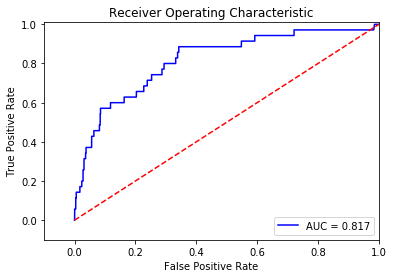

In [330]:
y_pred_10 = model_10_best.predict_proba(X_test_red)[:, 1]

fpr_10, tpr_10, thresholds_10 = roc_curve(y_test, y_pred_10)

roc_auc_10 = auc(fpr_10, tpr_10)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_10, tpr_10, 'b',label='AUC = %0.3f'% roc_auc_10)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

In [331]:
from sklearn.ensemble import RandomForestClassifier

parameters_11 = {
    'max_depth': [2, 3, 4, 5, 8, 10, 15, 20],
    'max_leaf_nodes': [2, 3, 4, 5, 8, 10, 15, 20],
    'class_weight': [None, 'balanced']   
}

np.random.seed(RANDOM_SEED)

model_11 = RandomForestClassifier(random_state = 0)
clf_11 = GridSearchCV(model_11, parameters_11, cv=5, verbose=5, n_jobs=4, scoring = 'roc_auc', return_train_score = True)
clf_11.fit(X_train_red, y_train)

result_11 = clf_11.cv_results_ 

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 380 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:    5.5s finished


In [332]:
pd.DataFrame([result_11['param_' + param] for param in parameters_11] + [result_11['mean_train_score'], result_11['mean_test_score']], index=list(parameters_11.keys()) + ['mean on train', 'mean_on_test'])

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
max_depth,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,15,15,20,20,20,20,20,20,20,20
max_leaf_nodes,2.000000,3.000000,4.000000,5.000000,8.000000,10.000000,15.000000,20.000000,2.000000,3.000000,...,15,20,2,3,4,5,8,10,15,20
class_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
mean on train,0.712899,0.759841,0.770116,0.782008,0.803801,0.803801,0.803801,0.803801,0.712899,0.759841,...,0.910789,0.93479,0.743539,0.780511,0.800045,0.817173,0.854799,0.871634,0.910789,0.93479
mean_on_test,0.672566,0.663837,0.679885,0.706786,0.717805,0.717805,0.717805,0.717805,0.672566,0.663837,...,0.735841,0.730603,0.69525,0.726806,0.743937,0.733768,0.739543,0.740804,0.735841,0.730603


In [333]:
np.random.seed(RANDOM_SEED)
model_11_best = DecisionTreeClassifier(max_depth = clf_11.best_params_['max_depth'], max_leaf_nodes=clf_11.best_params_['max_leaf_nodes'], class_weight=clf_11.best_params_['class_weight'], random_state = RANDOM_SEED)
model_11_best.fit(X_train_red, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

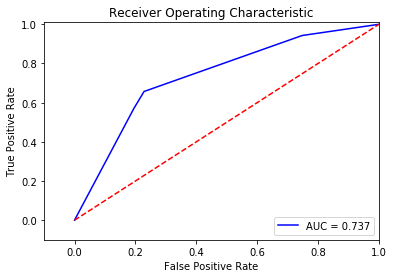

In [334]:
y_pred_11 = model_11_best.predict_proba(X_test_red)[:, 1]

fpr_11, tpr_11, thresholds_11 = roc_curve(y_test, y_pred_11)

roc_auc_11 = auc(fpr_11, tpr_11)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_11, tpr_11, 'b',label='AUC = %0.3f'% roc_auc_11)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Bagging with Other Classifiers



In [335]:
parameters_12 = {
    'base_estimator': [LogisticRegression(C = 0.1, penalty='l1'), 
                        DecisionTreeClassifier(max_depth = clf_8.best_params_['max_depth'], max_leaf_nodes=clf_8.best_params_['max_leaf_nodes'], class_weight=clf_8.best_params_['class_weight'], random_state=RANDOM_SEED),
                        LinearDiscriminantAnalysis()],
    'n_estimators': [5, 10, 20, 40],
    'max_features': [ 0.5, 0.75, 1.0],
    'max_samples': [0.5, 0.75, 1.0]
}

np.random.seed(RANDOM_SEED)

model_12 = BaggingClassifier(random_state = RANDOM_SEED)
clf_12 = GridSearchCV(model_12, parameters_12, cv=5, verbose=5, n_jobs=4, scoring = 'roc_auc', return_train_score = True)
clf_12.fit(X_train_red, y_train)

result_12 = clf_12.cv_results_ 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  72 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 252 tasks      | elapsed:   12.7s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:   20.4s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   22.2s finished


In [281]:
pd.DataFrame([result_12['param_' + param] for param in parameters_12] + [result_12['mean_train_score'], result_12['mean_test_score']], index=list(parameters_12.keys()) + ['mean on train', 'mean_on_test'])

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
max_features,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,1,1,1,1,1,1,1,1,1,1
n_estimators,5,10,20,40,5,10,20,40,5,10,...,20,40,5,10,20,40,5,10,20,40
max_samples,0.5,0.5,0.5,0.5,0.75,0.75,0.75,0.75,1,1,...,0.5,0.5,0.75,0.75,0.75,0.75,1,1,1,1
base_estimator,"LogisticRegression(C=0.1, class_weight=None, d...","LogisticRegression(C=0.1, class_weight=None, d...","LogisticRegression(C=0.1, class_weight=None, d...","LogisticRegression(C=0.1, class_weight=None, d...","LogisticRegression(C=0.1, class_weight=None, d...","LogisticRegression(C=0.1, class_weight=None, d...","LogisticRegression(C=0.1, class_weight=None, d...","LogisticRegression(C=0.1, class_weight=None, d...","LogisticRegression(C=0.1, class_weight=None, d...","LogisticRegression(C=0.1, class_weight=None, d...",...,"LinearDiscriminantAnalysis(n_components=None, ...","LinearDiscriminantAnalysis(n_components=None, ...","LinearDiscriminantAnalysis(n_components=None, ...","LinearDiscriminantAnalysis(n_components=None, ...","LinearDiscriminantAnalysis(n_components=None, ...","LinearDiscriminantAnalysis(n_components=None, ...","LinearDiscriminantAnalysis(n_components=None, ...","LinearDiscriminantAnalysis(n_components=None, ...","LinearDiscriminantAnalysis(n_components=None, ...","LinearDiscriminantAnalysis(n_components=None, ..."
mean on train,0.751038,0.762304,0.764055,0.766079,0.758541,0.768348,0.77077,0.770968,0.764822,0.770412,...,0.749952,0.746067,0.759908,0.763749,0.759079,0.755612,0.76644,0.765818,0.765138,0.760553
mean_on_test,0.732353,0.748615,0.739673,0.737462,0.739171,0.748024,0.740402,0.739847,0.740058,0.746216,...,0.723034,0.723428,0.706616,0.730403,0.727611,0.732677,0.697887,0.716377,0.714879,0.715334


In [336]:
clf_12.best_params_

{'base_estimator': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 10}

In [337]:
np.random.seed(RANDOM_SEED)
model_12_best = BaggingClassifier(base_estimator=clf_12.best_params_['base_estimator'], 
                                max_features = clf_12.best_params_['max_features'], max_samples = clf_12.best_params_['max_samples'], n_estimators = clf_12.best_params_['n_estimators'], random_state = RANDOM_SEED)
model_12_best.fit(X_train_red, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

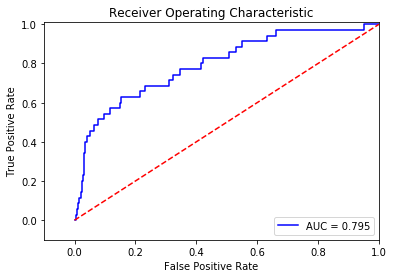

In [338]:
y_pred_12 = model_12_best.predict_proba(X_test_red)[:, 1]

fpr_12, tpr_12, thresholds_12 = roc_curve(y_test, y_pred_12)

roc_auc_12 = auc(fpr_12, tpr_12)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_12, tpr_12, 'b',label='AUC = %0.3f'% roc_auc_12)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## AdaBoost

In [339]:
parameters_13 = {
    'base_estimator': [ DecisionTreeClassifier(max_depth = clf_8.best_params_['max_depth'], max_leaf_nodes=clf_8.best_params_['max_leaf_nodes'], class_weight=clf_8.best_params_['class_weight']), RandomForestClassifier(max_depth = clf_11.best_params_['max_depth'], max_leaf_nodes=clf_11.best_params_['max_leaf_nodes'], class_weight=clf_11.best_params_['class_weight'])],
    'n_estimators': [5, 10, 20],
    'learning_rate': [ 0.5, 0.75, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

from sklearn.ensemble import AdaBoostClassifier

np.random.seed(RANDOM_SEED)

model_13 = AdaBoostClassifier(random_state = RANDOM_SEED)
clf_13 = GridSearchCV(model_13, parameters_13, cv=5, verbose=5, n_jobs=4, scoring = 'roc_auc', return_train_score = True)
clf_13.fit(X_train_red, y_train)

result_13 = clf_13.cv_results_ 


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    9.1s finished


In [340]:
pd.DataFrame([result_13['param_' + param] for param in parameters_13] + [result_13['mean_train_score'], result_13['mean_test_score']], index=list(parameters_13.keys()) + ['mean on train', 'mean_on_test'])

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
learning_rate,0.5,0.5,0.5,0.75,0.75,0.75,1,1,1,0.5,...,1,0.5,0.5,0.5,0.75,0.75,0.75,1,1,1
n_estimators,5,10,20,5,10,20,5,10,20,5,...,20,5,10,20,5,10,20,5,10,20
base_estimator,DecisionTreeClassifier(class_weight='balanced'...,DecisionTreeClassifier(class_weight='balanced'...,DecisionTreeClassifier(class_weight='balanced'...,DecisionTreeClassifier(class_weight='balanced'...,DecisionTreeClassifier(class_weight='balanced'...,DecisionTreeClassifier(class_weight='balanced'...,DecisionTreeClassifier(class_weight='balanced'...,DecisionTreeClassifier(class_weight='balanced'...,DecisionTreeClassifier(class_weight='balanced'...,"RandomForestClassifier(bootstrap=True, class_w...",...,DecisionTreeClassifier(class_weight='balanced'...,"RandomForestClassifier(bootstrap=True, class_w...","RandomForestClassifier(bootstrap=True, class_w...","RandomForestClassifier(bootstrap=True, class_w...","RandomForestClassifier(bootstrap=True, class_w...","RandomForestClassifier(bootstrap=True, class_w...","RandomForestClassifier(bootstrap=True, class_w...","RandomForestClassifier(bootstrap=True, class_w...","RandomForestClassifier(bootstrap=True, class_w...","RandomForestClassifier(bootstrap=True, class_w..."
algorithm,SAMME,SAMME,SAMME,SAMME,SAMME,SAMME,SAMME,SAMME,SAMME,SAMME,...,SAMME.R,SAMME.R,SAMME.R,SAMME.R,SAMME.R,SAMME.R,SAMME.R,SAMME.R,SAMME.R,SAMME.R
mean on train,0.840142,0.846332,0.846332,0.872404,0.877572,0.877572,0.877733,0.886271,0.888769,0.748103,...,1,0.837153,0.87019,0.908641,0.847492,0.893616,0.938112,0.857999,0.910729,0.953473
mean_on_test,0.681485,0.684169,0.684169,0.678993,0.665696,0.665696,0.626082,0.640678,0.63879,0.627679,...,0.621126,0.724409,0.722188,0.715923,0.72733,0.710037,0.70416,0.72047,0.707291,0.696121


In [341]:
clf_13.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='gini', max_depth=2, max_features='auto',
             max_leaf_nodes=4, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 'learning_rate': 0.75,
 'n_estimators': 5}

In [343]:
np.random.seed(RANDOM_SEED)
model_13_best = AdaBoostClassifier(base_estimator=clf_13.best_params_['base_estimator'], 
                                n_estimators = clf_13.best_params_['n_estimators'], 
                                learning_rate = clf_13.best_params_['learning_rate'],
                                algorithm = clf_13.best_params_['algorithm'],
                                random_state = RANDOM_SEED)
model_13_best.fit(X_train_red, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=2, max_features='auto',
            max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=0.75, n_estimators=5, random_state=0)

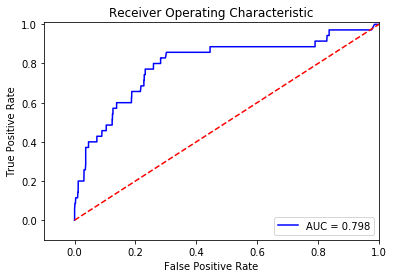

In [344]:
y_pred_13 = model_13_best.predict_proba(X_test_red)[:, 1]

fpr_13, tpr_13, thresholds_13 = roc_curve(y_test, y_pred_13)

roc_auc_13 = auc(fpr_13, tpr_13)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_13, tpr_13, 'b',label='AUC = %0.3f'% roc_auc_13)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Summary

**TEST_SIZE = 0.4**

| ORDER | LIBRARY | MODEL                              | STATE_0 | STATE_1 | STATE_2 | STATE_3 | STATE_4 | MEAN   | STD      |
|-------|---------|------------------------------------|---------|---------|---------|---------|---------|--------|----------|
| 3     | keras   | LogisticRegression                 | 0,808   | 0,805   | 0,787   | 0,73    | 0,739   | 0,7738 | 0,036901 |
| 1     | sklearn | LogisticRegression                 | 0,8     | 0,769   | 0,806   | 0,739   | 0,724   | 0,7676 | 0,036212 |
| 5     | keras   | FNN (2)                            | 0,826   | 0,747   | 0,788   | 0,728   | 0,742   | 0,7662 | 0,040202 |
| 12    | sklearn | Bagging, Dimension--               | 0,795   | 0,798   | 0,806   | 0,704   | 0,726   | 0,7658 | 0,047193 |
| 13    | sklearn | AdaBoost, Dimension--              | 0,798   | 0,759   | 0,8     | 0,722   | 0,747   | 0,7652 | 0,033626 |
| 6     | sklearn | LDA, Dimension--                   | 0,809   | 0,773   | 0,798   | 0,732   | 0,714   | 0,7652 | 0,041167 |
| 2     | sklearn | LogisticRegression, Dimension--    | 0,809   | 0,769   | 0,793   | 0,731   | 0,724   | 0,7652 | 0,037326 |
| 9     | sklearn | Bagging, DecisionTree              | 0,748   | 0,802   | 0,805   | 0,733   | 0,728   | 0,7632 | 0,037533 |
| 10    | sklearn | Bagging, DecisionTree, Dimension-- | 0,817   | 0,764   | 0,796   | 0,724   | 0,703   | 0,7608 | 0,047704 |
| 4     | keras   | FNN (1)                            | 0,82    | 0,724   | 0,723   | 0,694   | 0,715   | 0,7352 | 0,048915 |
| 8     | sklearn | DecisionTree, Dimension--          | 0,74    | 0,67    | 0,7     | 0,711   | 0,644   | 0,693  | 0,037121 |
| 7     | sklearn | QDA, Dimension--                   | 0,806   | 0,479   | 0,724   | 0,708   | 0,703   | 0,684  | 0,121908 |
| 11    | sklearn | RandomForest                       | 0,737   | 0,571   | 0,669   | 0,617   | 0,55    | 0,6288 | 0,07585  |

**TEST_SIZE = 0.25**

| ORDER | LIBRARY | MODEL                              | STATE_0 | STATE_1 | STATE_2 | STATE_3 | STATE_4 | MEAN   | STD      |
|-------|---------|------------------------------------|---------|---------|---------|---------|---------|--------|----------|
| 5     | keras   | FNN (2)                            | 0,821   | 0,829   | 0,826   | 0,705   | 0,761   | 0,7884 | 0,054386 |
| 9     | sklearn | Bagging, DecisionTree              | 0,768   | 0,815   | 0,853   | 0,687   | 0,728   | 0,7702 | 0,066277 |
| 10    | sklearn | Bagging, DecisionTree, Dimension-- | 0,765   | 0,799   | 0,822   | 0,697   | 0,741   | 0,7648 | 0,049002 |
| 3     | keras   | LogisticRegression                 | 0,806   | 0,749   | 0,825   | 0,703   | 0,737   | 0,764  | 0,050398 |
| 1     | sklearn | LogisticRegression                 | 0,783   | 0,772   | 0,812   | 0,697   | 0,735   | 0,7598 | 0,04464  |
| 2     | sklearn | LogisticRegression, Dimension--    | 0,783   | 0,773   | 0,812   | 0,704   | 0,724   | 0,7592 | 0,044246 |
| 4     | keras   | FNN (1)                            | 0,797   | 0,797   | 0,776   | 0,687   | 0,738   | 0,759  | 0,046909 |
| 13    | sklearn | AdaBoost, Dimension--              | 0,765   | 0,748   | 0,824   | 0,698   | 0,747   | 0,7564 | 0,045313 |
| 12    | sklearn | Bagging, Dimension--               | 0,765   | 0,764   | 0,769   | 0,701   | 0,734   | 0,7466 | 0,029074 |
| 6     | sklearn | LDA, Dimension--                   | 0,78    | 0,759   | 0,782   | 0,688   | 0,723   | 0,7464 | 0,040352 |
| 8     | sklearn | DecisionTree, Dimension--          | 0,684   | 0,771   | 0,721   | 0,591   | 0,615   | 0,6764 | 0,074262 |
| 11    | sklearn | RandomForest                       | 0,571   | 0,678   | 0,701   | 0,592   | 0,548   | 0,618  | 0,067591 |
| 7     | sklearn | QDA, Dimension--                   | 0,508   | 0,471   | 0,466   | 0,675   | 0,498   | 0,5236 | 0,086466 |

**TEST_SIZE = 0.2**

| ORDER | LIBRARY | MODEL                              | STATE_0 | STATE_1 | STATE_2 | STATE_3 | STATE_4 | MEAN   | STD      |
|-------|---------|------------------------------------|---------|---------|---------|---------|---------|--------|----------|
| 5     | keras   | FNN (2)                            | 0,815   | 0,824   | 0,815   | 0,703   | 0,753   | 0,782  | 0,052498 |
| 3     | keras   | LogisticRegression                 | 0,837   | 0,827   | 0,785   | 0,722   | 0,725   | 0,7792 | 0,054472 |
| 9     | sklearn | Bagging, DecisionTree              | 0,811   | 0,828   | 0,784   | 0,712   | 0,7     | 0,767  | 0,058009 |
| 13    | sklearn | AdaBoost, Dimension--              | 0,809   | 0,802   | 0,779   | 0,684   | 0,757   | 0,7662 | 0,050296 |
| 2     | sklearn | LogisticRegression, Dimension--    | 0,828   | 0,819   | 0,76    | 0,709   | 0,713   | 0,7658 | 0,056451 |
| 1     | sklearn | LogisticRegression                 | 0,808   | 0,815   | 0,779   | 0,709   | 0,713   | 0,7648 | 0,050953 |
| 10    | sklearn | Bagging, DecisionTree, Dimension-- | 0,8     | 0,811   | 0,781   | 0,685   | 0,726   | 0,7606 | 0,053435 |
| 12    | sklearn | Bagging, Dimension--               | 0,812   | 0,838   | 0,775   | 0,664   | 0,702   | 0,7582 | 0,073445 |
| 6     | sklearn | LDA, Dimension--                   | 0,803   | 0,817   | 0,75    | 0,711   | 0,705   | 0,7572 | 0,051441 |
| 4     | keras   | FNN (1)                            | 0,815   | 0,737   | 0,809   | 0,654   | 0,72    | 0,747  | 0,066981 |
| 8     | sklearn | DecisionTree, Dimension--          | 0,757   | 0,798   | 0,749   | 0,617   | 0,735   | 0,7312 | 0,068009 |
| 7     | sklearn | QDA, Dimension--                   | 0,816   | 0,46    | 0,656   | 0,579   | 0,68    | 0,6382 | 0,131279 |
| 11    | sklearn | RandomForest                       | 0,7     | 0,695   | 0,587   | 0,563   | 0,473   | 0,6036 | 0,095691 |